In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
# oversample = SMOTE(sampling_strategy=1)
# X_train, Y_train = oversample.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:16])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
Counter({0: 1})
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Gender', 'Age', 'State',
       'Injury Agent ', 'Confined Space', 'Grain Involved', 'Alcohol/Drugs',
       'Seatbelt', 'Helmet', 'Fatal'],
      dtype='object')


In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestClassifier 

In [3]:
# from bayes_opt import BayesianOptimization, UtilityFunction
# import warnings
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import cross_val_score
# def objective(n_estimators, n_trees,max_layers):
#     model = CascadeForestClassifier(n_estimators = int(n_estimators),
#                                   n_trees= int(n_trees),
#                                   max_layers= (max_layers))

#     return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
# param_bounds = {
#     'n_estimators': (1, 200),
#     'n_trees': (1,500),
#     'max_layers': (1,20)
# }
# optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
# optimizer.maximize(init_points=5, n_iter=5)
# best_params = optimizer.max['params']

In [4]:
# model = CascadeForestClassifier(n_estimators=int(best_params['n_estimators']),n_trees = int(best_params['n_trees']),max_layers= int(best_params['max_layers']))
# model.fit(X_train, Y_train)

In [3]:
model = CascadeForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-11-03 05:42:23.957] Start to fit the model:
[2024-11-03 05:42:23.958] Fitting cascade layer = 0 
[2024-11-03 05:42:27.920] layer = 0  | Val Acc = 64.463 % | Elapsed = 3.962 s
[2024-11-03 05:42:27.949] Fitting cascade layer = 1 
[2024-11-03 05:42:36.575] layer = 1  | Val Acc = 70.093 % | Elapsed = 8.626 s
[2024-11-03 05:42:36.598] Fitting cascade layer = 2 
[2024-11-03 05:42:44.365] layer = 2  | Val Acc = 69.628 % | Elapsed = 7.767 s
[2024-11-03 05:42:44.365] Early stopping counter: 1 out of 2
[2024-11-03 05:42:44.387] Fitting cascade layer = 3 
[2024-11-03 05:42:52.430] layer = 3  | Val Acc = 69.267 % | Elapsed = 8.043 s
[2024-11-03 05:42:52.430] Early stopping counter: 2 out of 2
[2024-11-03 05:42:52.431] Handling early stopping
[2024-11-03 05:42:52.434] The optimal number of layers: 2


In [4]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2024-11-03 05:42:52.451] Start to evalute the model:
[2024-11-03 05:42:52.451] Evaluating cascade layer = 0 
[2024-11-03 05:42:52.623] Evaluating cascade layer = 1 
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

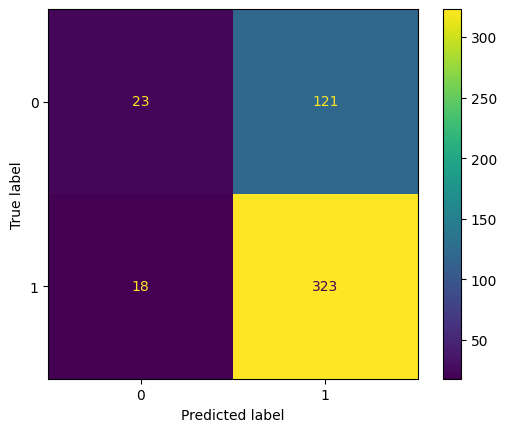

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

[2024-11-01 01:21:16.136] Start to evalute the model:
[2024-11-01 01:21:16.136] Evaluating cascade layer = 0 
[2024-11-01 01:21:16.207] Evaluating cascade layer = 1 
[2024-11-01 01:21:16.269] Evaluating cascade layer = 2 
[2024-11-01 01:21:16.334] Evaluating cascade layer = 3 
[2024-11-01 01:21:16.396] Evaluating cascade layer = 4 


  0%|          | 0/100 [00:00<?, ?it/s]

[2024-11-01 01:21:16.492] Start to evalute the model:
[2024-11-01 01:21:16.492] Evaluating cascade layer = 0 
[2024-11-01 01:21:16.521] Evaluating cascade layer = 1 
[2024-11-01 01:21:16.549] Evaluating cascade layer = 2 
[2024-11-01 01:21:16.577] Evaluating cascade layer = 3 
[2024-11-01 01:21:16.611] Evaluating cascade layer = 4 
[2024-11-01 01:21:16.679] Start to evalute the model:
[2024-11-01 01:21:16.711] Evaluating cascade layer = 0 
[2024-11-01 01:22:06.563] Evaluating cascade layer = 1 
[2024-11-01 01:22:59.177] Evaluating cascade layer = 2 
[2024-11-01 01:23:51.443] Evaluating cascade layer = 3 
[2024-11-01 01:24:50.722] Evaluating cascade layer = 4 


  1%|          | 1/100 [04:32<7:29:47, 272.60s/it]

[2024-11-01 01:25:49.110] Start to evalute the model:
[2024-11-01 01:25:49.110] Evaluating cascade layer = 0 
[2024-11-01 01:25:49.156] Evaluating cascade layer = 1 
[2024-11-01 01:25:49.199] Evaluating cascade layer = 2 
[2024-11-01 01:25:49.242] Evaluating cascade layer = 3 
[2024-11-01 01:25:49.285] Evaluating cascade layer = 4 
[2024-11-01 01:25:49.386] Start to evalute the model:
[2024-11-01 01:25:49.433] Evaluating cascade layer = 0 
[2024-11-01 01:26:41.927] Evaluating cascade layer = 1 
[2024-11-01 01:27:31.458] Evaluating cascade layer = 2 
[2024-11-01 01:28:22.956] Evaluating cascade layer = 3 
[2024-11-01 01:29:20.301] Evaluating cascade layer = 4 


  2%|▏         | 2/100 [09:01<7:21:47, 270.49s/it]

[2024-11-01 01:30:18.119] Start to evalute the model:
[2024-11-01 01:30:18.120] Evaluating cascade layer = 0 
[2024-11-01 01:30:18.164] Evaluating cascade layer = 1 
[2024-11-01 01:30:18.207] Evaluating cascade layer = 2 
[2024-11-01 01:30:18.250] Evaluating cascade layer = 3 
[2024-11-01 01:30:18.294] Evaluating cascade layer = 4 
[2024-11-01 01:30:18.392] Start to evalute the model:
[2024-11-01 01:30:18.437] Evaluating cascade layer = 0 
[2024-11-01 01:31:14.868] Evaluating cascade layer = 1 
[2024-11-01 01:32:01.897] Evaluating cascade layer = 2 
[2024-11-01 01:32:45.776] Evaluating cascade layer = 3 
[2024-11-01 01:33:29.777] Evaluating cascade layer = 4 


  3%|▎         | 3/100 [13:04<6:56:55, 257.89s/it]

[2024-11-01 01:34:21.009] Start to evalute the model:
[2024-11-01 01:34:21.009] Evaluating cascade layer = 0 
[2024-11-01 01:34:21.055] Evaluating cascade layer = 1 
[2024-11-01 01:34:21.109] Evaluating cascade layer = 2 
[2024-11-01 01:34:21.165] Evaluating cascade layer = 3 
[2024-11-01 01:34:21.207] Evaluating cascade layer = 4 
[2024-11-01 01:34:21.302] Start to evalute the model:
[2024-11-01 01:34:21.353] Evaluating cascade layer = 0 
[2024-11-01 01:35:04.725] Evaluating cascade layer = 1 
[2024-11-01 01:35:56.127] Evaluating cascade layer = 2 
[2024-11-01 01:36:45.017] Evaluating cascade layer = 3 
[2024-11-01 01:37:34.064] Evaluating cascade layer = 4 


  4%|▍         | 4/100 [17:02<6:40:19, 250.21s/it]

[2024-11-01 01:38:19.429] Start to evalute the model:
[2024-11-01 01:38:19.429] Evaluating cascade layer = 0 
[2024-11-01 01:38:19.459] Evaluating cascade layer = 1 
[2024-11-01 01:38:19.487] Evaluating cascade layer = 2 
[2024-11-01 01:38:19.514] Evaluating cascade layer = 3 
[2024-11-01 01:38:19.543] Evaluating cascade layer = 4 
[2024-11-01 01:38:19.607] Start to evalute the model:
[2024-11-01 01:38:19.638] Evaluating cascade layer = 0 
[2024-11-01 01:39:06.523] Evaluating cascade layer = 1 
[2024-11-01 01:39:51.391] Evaluating cascade layer = 2 
[2024-11-01 01:40:38.508] Evaluating cascade layer = 3 
[2024-11-01 01:41:24.677] Evaluating cascade layer = 4 


  5%|▌         | 5/100 [20:46<6:20:45, 240.48s/it]

[2024-11-01 01:42:02.651] Start to evalute the model:
[2024-11-01 01:42:02.651] Evaluating cascade layer = 0 
[2024-11-01 01:42:02.678] Evaluating cascade layer = 1 
[2024-11-01 01:42:02.704] Evaluating cascade layer = 2 
[2024-11-01 01:42:02.727] Evaluating cascade layer = 3 
[2024-11-01 01:42:02.752] Evaluating cascade layer = 4 
[2024-11-01 01:42:02.806] Start to evalute the model:
[2024-11-01 01:42:02.835] Evaluating cascade layer = 0 
[2024-11-01 01:42:38.919] Evaluating cascade layer = 1 
[2024-11-01 01:43:18.403] Evaluating cascade layer = 2 
[2024-11-01 01:43:56.458] Evaluating cascade layer = 3 
[2024-11-01 01:44:33.614] Evaluating cascade layer = 4 


  6%|▌         | 6/100 [23:55<5:49:25, 223.04s/it]

[2024-11-01 01:45:11.839] Start to evalute the model:
[2024-11-01 01:45:11.839] Evaluating cascade layer = 0 
[2024-11-01 01:45:11.869] Evaluating cascade layer = 1 
[2024-11-01 01:45:11.895] Evaluating cascade layer = 2 
[2024-11-01 01:45:11.920] Evaluating cascade layer = 3 
[2024-11-01 01:45:11.945] Evaluating cascade layer = 4 
[2024-11-01 01:45:12.001] Start to evalute the model:
[2024-11-01 01:45:12.032] Evaluating cascade layer = 0 
[2024-11-01 01:45:51.412] Evaluating cascade layer = 1 
[2024-11-01 01:46:26.184] Evaluating cascade layer = 2 
[2024-11-01 01:47:06.409] Evaluating cascade layer = 3 
[2024-11-01 01:47:44.804] Evaluating cascade layer = 4 


  7%|▋         | 7/100 [27:05<5:28:53, 212.19s/it]

[2024-11-01 01:48:21.697] Start to evalute the model:
[2024-11-01 01:48:21.697] Evaluating cascade layer = 0 
[2024-11-01 01:48:21.723] Evaluating cascade layer = 1 
[2024-11-01 01:48:21.749] Evaluating cascade layer = 2 
[2024-11-01 01:48:21.774] Evaluating cascade layer = 3 
[2024-11-01 01:48:21.798] Evaluating cascade layer = 4 
[2024-11-01 01:48:21.855] Start to evalute the model:
[2024-11-01 01:48:21.889] Evaluating cascade layer = 0 
[2024-11-01 01:49:03.686] Evaluating cascade layer = 1 
[2024-11-01 01:49:44.760] Evaluating cascade layer = 2 
[2024-11-01 01:50:24.334] Evaluating cascade layer = 3 
[2024-11-01 01:51:05.620] Evaluating cascade layer = 4 


  8%|▊         | 8/100 [30:27<5:20:40, 209.13s/it]

[2024-11-01 01:51:44.275] Start to evalute the model:
[2024-11-01 01:51:44.276] Evaluating cascade layer = 0 
[2024-11-01 01:51:44.304] Evaluating cascade layer = 1 
[2024-11-01 01:51:44.328] Evaluating cascade layer = 2 
[2024-11-01 01:51:44.353] Evaluating cascade layer = 3 
[2024-11-01 01:51:44.379] Evaluating cascade layer = 4 
[2024-11-01 01:51:44.435] Start to evalute the model:
[2024-11-01 01:51:44.460] Evaluating cascade layer = 0 
[2024-11-01 01:52:22.653] Evaluating cascade layer = 1 
[2024-11-01 01:53:04.449] Evaluating cascade layer = 2 
[2024-11-01 01:53:47.387] Evaluating cascade layer = 3 
[2024-11-01 01:54:29.496] Evaluating cascade layer = 4 


  9%|▉         | 9/100 [33:54<5:15:57, 208.33s/it]

[2024-11-01 01:55:10.842] Start to evalute the model:
[2024-11-01 01:55:10.843] Evaluating cascade layer = 0 
[2024-11-01 01:55:10.879] Evaluating cascade layer = 1 
[2024-11-01 01:55:10.908] Evaluating cascade layer = 2 
[2024-11-01 01:55:10.936] Evaluating cascade layer = 3 
[2024-11-01 01:55:10.969] Evaluating cascade layer = 4 
[2024-11-01 01:55:11.039] Start to evalute the model:
[2024-11-01 01:55:11.071] Evaluating cascade layer = 0 
[2024-11-01 01:55:57.546] Evaluating cascade layer = 1 
[2024-11-01 01:56:39.227] Evaluating cascade layer = 2 
[2024-11-01 01:57:20.931] Evaluating cascade layer = 3 
[2024-11-01 01:58:00.209] Evaluating cascade layer = 4 


 10%|█         | 10/100 [37:26<5:14:02, 209.36s/it]

[2024-11-01 01:58:42.522] Start to evalute the model:
[2024-11-01 01:58:42.522] Evaluating cascade layer = 0 
[2024-11-01 01:58:42.553] Evaluating cascade layer = 1 
[2024-11-01 01:58:42.580] Evaluating cascade layer = 2 
[2024-11-01 01:58:42.608] Evaluating cascade layer = 3 
[2024-11-01 01:58:42.635] Evaluating cascade layer = 4 
[2024-11-01 01:58:42.697] Start to evalute the model:
[2024-11-01 01:58:42.730] Evaluating cascade layer = 0 
[2024-11-01 01:59:18.080] Evaluating cascade layer = 1 
[2024-11-01 01:59:55.959] Evaluating cascade layer = 2 
[2024-11-01 02:00:33.816] Evaluating cascade layer = 3 
[2024-11-01 02:01:12.843] Evaluating cascade layer = 4 


 11%|█         | 11/100 [40:35<5:01:26, 203.22s/it]

[2024-11-01 02:01:51.818] Start to evalute the model:
[2024-11-01 02:01:51.818] Evaluating cascade layer = 0 
[2024-11-01 02:01:51.845] Evaluating cascade layer = 1 
[2024-11-01 02:01:51.868] Evaluating cascade layer = 2 
[2024-11-01 02:01:51.893] Evaluating cascade layer = 3 
[2024-11-01 02:01:51.916] Evaluating cascade layer = 4 
[2024-11-01 02:01:51.972] Start to evalute the model:
[2024-11-01 02:01:51.999] Evaluating cascade layer = 0 
[2024-11-01 02:02:29.748] Evaluating cascade layer = 1 
[2024-11-01 02:03:04.496] Evaluating cascade layer = 2 
[2024-11-01 02:03:39.958] Evaluating cascade layer = 3 
[2024-11-01 02:04:16.983] Evaluating cascade layer = 4 


 12%|█▏        | 12/100 [43:37<4:48:49, 196.92s/it]

[2024-11-01 02:04:54.331] Start to evalute the model:
[2024-11-01 02:04:54.332] Evaluating cascade layer = 0 
[2024-11-01 02:04:54.361] Evaluating cascade layer = 1 
[2024-11-01 02:04:54.387] Evaluating cascade layer = 2 
[2024-11-01 02:04:54.411] Evaluating cascade layer = 3 
[2024-11-01 02:04:54.434] Evaluating cascade layer = 4 
[2024-11-01 02:04:54.490] Start to evalute the model:
[2024-11-01 02:04:54.520] Evaluating cascade layer = 0 
[2024-11-01 02:05:27.132] Evaluating cascade layer = 1 
[2024-11-01 02:05:59.582] Evaluating cascade layer = 2 
[2024-11-01 02:06:33.550] Evaluating cascade layer = 3 
[2024-11-01 02:07:08.137] Evaluating cascade layer = 4 


 13%|█▎        | 13/100 [46:26<4:33:14, 188.44s/it]

[2024-11-01 02:07:43.263] Start to evalute the model:
[2024-11-01 02:07:43.263] Evaluating cascade layer = 0 
[2024-11-01 02:07:43.289] Evaluating cascade layer = 1 
[2024-11-01 02:07:43.315] Evaluating cascade layer = 2 
[2024-11-01 02:07:43.340] Evaluating cascade layer = 3 
[2024-11-01 02:07:43.364] Evaluating cascade layer = 4 
[2024-11-01 02:07:43.420] Start to evalute the model:
[2024-11-01 02:07:43.447] Evaluating cascade layer = 0 
[2024-11-01 02:08:19.473] Evaluating cascade layer = 1 
[2024-11-01 02:08:54.913] Evaluating cascade layer = 2 
[2024-11-01 02:09:31.397] Evaluating cascade layer = 3 
[2024-11-01 02:10:08.821] Evaluating cascade layer = 4 


 14%|█▍        | 14/100 [49:29<4:27:36, 186.70s/it]

[2024-11-01 02:10:45.953] Start to evalute the model:
[2024-11-01 02:10:45.953] Evaluating cascade layer = 0 
[2024-11-01 02:10:45.982] Evaluating cascade layer = 1 
[2024-11-01 02:10:46.007] Evaluating cascade layer = 2 
[2024-11-01 02:10:46.032] Evaluating cascade layer = 3 
[2024-11-01 02:10:46.059] Evaluating cascade layer = 4 
[2024-11-01 02:10:46.117] Start to evalute the model:
[2024-11-01 02:10:46.147] Evaluating cascade layer = 0 
[2024-11-01 02:11:28.191] Evaluating cascade layer = 1 
[2024-11-01 02:12:06.676] Evaluating cascade layer = 2 
[2024-11-01 02:12:44.281] Evaluating cascade layer = 3 
[2024-11-01 02:13:23.420] Evaluating cascade layer = 4 


 15%|█▌        | 15/100 [52:47<4:29:27, 190.21s/it]

[2024-11-01 02:14:04.283] Start to evalute the model:
[2024-11-01 02:14:04.284] Evaluating cascade layer = 0 
[2024-11-01 02:14:04.319] Evaluating cascade layer = 1 
[2024-11-01 02:14:04.352] Evaluating cascade layer = 2 
[2024-11-01 02:14:04.384] Evaluating cascade layer = 3 
[2024-11-01 02:14:04.418] Evaluating cascade layer = 4 
[2024-11-01 02:14:04.484] Start to evalute the model:
[2024-11-01 02:14:04.513] Evaluating cascade layer = 0 
[2024-11-01 02:14:37.267] Evaluating cascade layer = 1 
[2024-11-01 02:15:11.872] Evaluating cascade layer = 2 
[2024-11-01 02:15:46.272] Evaluating cascade layer = 3 
[2024-11-01 02:16:21.438] Evaluating cascade layer = 4 


 16%|█▌        | 16/100 [55:40<4:19:05, 185.07s/it]

[2024-11-01 02:16:57.419] Start to evalute the model:
[2024-11-01 02:16:57.419] Evaluating cascade layer = 0 
[2024-11-01 02:16:57.459] Evaluating cascade layer = 1 
[2024-11-01 02:16:57.499] Evaluating cascade layer = 2 
[2024-11-01 02:16:57.539] Evaluating cascade layer = 3 
[2024-11-01 02:16:57.579] Evaluating cascade layer = 4 
[2024-11-01 02:16:57.674] Start to evalute the model:
[2024-11-01 02:16:57.715] Evaluating cascade layer = 0 
[2024-11-01 02:17:38.152] Evaluating cascade layer = 1 
[2024-11-01 02:18:14.111] Evaluating cascade layer = 2 
[2024-11-01 02:18:49.768] Evaluating cascade layer = 3 
[2024-11-01 02:19:26.214] Evaluating cascade layer = 4 


 17%|█▋        | 17/100 [58:46<4:16:22, 185.34s/it]

[2024-11-01 02:20:03.368] Start to evalute the model:
[2024-11-01 02:20:03.369] Evaluating cascade layer = 0 
[2024-11-01 02:20:03.396] Evaluating cascade layer = 1 
[2024-11-01 02:20:03.421] Evaluating cascade layer = 2 
[2024-11-01 02:20:03.445] Evaluating cascade layer = 3 
[2024-11-01 02:20:03.469] Evaluating cascade layer = 4 
[2024-11-01 02:20:03.528] Start to evalute the model:
[2024-11-01 02:20:03.555] Evaluating cascade layer = 0 
[2024-11-01 02:20:35.465] Evaluating cascade layer = 1 
[2024-11-01 02:21:11.755] Evaluating cascade layer = 2 
[2024-11-01 02:21:48.504] Evaluating cascade layer = 3 
[2024-11-01 02:22:25.595] Evaluating cascade layer = 4 


 18%|█▊        | 18/100 [1:01:47<4:11:32, 184.06s/it]

[2024-11-01 02:23:04.448] Start to evalute the model:
[2024-11-01 02:23:04.449] Evaluating cascade layer = 0 
[2024-11-01 02:23:04.483] Evaluating cascade layer = 1 
[2024-11-01 02:23:04.510] Evaluating cascade layer = 2 
[2024-11-01 02:23:04.535] Evaluating cascade layer = 3 
[2024-11-01 02:23:04.560] Evaluating cascade layer = 4 
[2024-11-01 02:23:04.624] Start to evalute the model:
[2024-11-01 02:23:04.655] Evaluating cascade layer = 0 
[2024-11-01 02:23:42.935] Evaluating cascade layer = 1 
[2024-11-01 02:24:20.870] Evaluating cascade layer = 2 
[2024-11-01 02:24:58.272] Evaluating cascade layer = 3 
[2024-11-01 02:25:34.977] Evaluating cascade layer = 4 


 19%|█▉        | 19/100 [1:04:55<4:09:59, 185.18s/it]

[2024-11-01 02:26:12.232] Start to evalute the model:
[2024-11-01 02:26:12.232] Evaluating cascade layer = 0 
[2024-11-01 02:26:12.258] Evaluating cascade layer = 1 
[2024-11-01 02:26:12.285] Evaluating cascade layer = 2 
[2024-11-01 02:26:12.311] Evaluating cascade layer = 3 
[2024-11-01 02:26:12.337] Evaluating cascade layer = 4 
[2024-11-01 02:26:12.404] Start to evalute the model:
[2024-11-01 02:26:12.435] Evaluating cascade layer = 0 
[2024-11-01 02:26:45.718] Evaluating cascade layer = 1 
[2024-11-01 02:27:21.119] Evaluating cascade layer = 2 
[2024-11-01 02:27:59.615] Evaluating cascade layer = 3 
[2024-11-01 02:28:41.920] Evaluating cascade layer = 4 


 20%|██        | 20/100 [1:08:04<4:08:11, 186.15s/it]

[2024-11-01 02:29:20.638] Start to evalute the model:
[2024-11-01 02:29:20.638] Evaluating cascade layer = 0 
[2024-11-01 02:29:20.667] Evaluating cascade layer = 1 
[2024-11-01 02:29:20.695] Evaluating cascade layer = 2 
[2024-11-01 02:29:20.725] Evaluating cascade layer = 3 
[2024-11-01 02:29:20.752] Evaluating cascade layer = 4 
[2024-11-01 02:29:20.812] Start to evalute the model:
[2024-11-01 02:29:20.843] Evaluating cascade layer = 0 
[2024-11-01 02:29:55.045] Evaluating cascade layer = 1 
[2024-11-01 02:30:30.924] Evaluating cascade layer = 2 
[2024-11-01 02:31:07.857] Evaluating cascade layer = 3 
[2024-11-01 02:31:46.103] Evaluating cascade layer = 4 


 21%|██        | 21/100 [1:11:12<4:05:57, 186.80s/it]

[2024-11-01 02:32:28.963] Start to evalute the model:
[2024-11-01 02:32:28.963] Evaluating cascade layer = 0 
[2024-11-01 02:32:28.990] Evaluating cascade layer = 1 
[2024-11-01 02:32:29.018] Evaluating cascade layer = 2 
[2024-11-01 02:32:29.043] Evaluating cascade layer = 3 
[2024-11-01 02:32:29.069] Evaluating cascade layer = 4 
[2024-11-01 02:32:29.129] Start to evalute the model:
[2024-11-01 02:32:29.162] Evaluating cascade layer = 0 
[2024-11-01 02:33:12.581] Evaluating cascade layer = 1 
[2024-11-01 02:33:56.822] Evaluating cascade layer = 2 
[2024-11-01 02:34:36.867] Evaluating cascade layer = 3 
[2024-11-01 02:35:16.011] Evaluating cascade layer = 4 


 22%|██▏       | 22/100 [1:14:38<4:10:14, 192.49s/it]

[2024-11-01 02:35:54.726] Start to evalute the model:
[2024-11-01 02:35:54.727] Evaluating cascade layer = 0 
[2024-11-01 02:35:54.757] Evaluating cascade layer = 1 
[2024-11-01 02:35:54.785] Evaluating cascade layer = 2 
[2024-11-01 02:35:54.812] Evaluating cascade layer = 3 
[2024-11-01 02:35:54.838] Evaluating cascade layer = 4 
[2024-11-01 02:35:54.900] Start to evalute the model:
[2024-11-01 02:35:54.930] Evaluating cascade layer = 0 
[2024-11-01 02:36:35.297] Evaluating cascade layer = 1 
[2024-11-01 02:37:11.418] Evaluating cascade layer = 2 
[2024-11-01 02:37:50.733] Evaluating cascade layer = 3 
[2024-11-01 02:38:31.620] Evaluating cascade layer = 4 


 23%|██▎       | 23/100 [1:17:55<4:09:02, 194.06s/it]

[2024-11-01 02:39:12.439] Start to evalute the model:
[2024-11-01 02:39:12.440] Evaluating cascade layer = 0 
[2024-11-01 02:39:12.467] Evaluating cascade layer = 1 
[2024-11-01 02:39:12.496] Evaluating cascade layer = 2 
[2024-11-01 02:39:12.523] Evaluating cascade layer = 3 
[2024-11-01 02:39:12.549] Evaluating cascade layer = 4 
[2024-11-01 02:39:12.607] Start to evalute the model:
[2024-11-01 02:39:12.637] Evaluating cascade layer = 0 
[2024-11-01 02:39:53.416] Evaluating cascade layer = 1 
[2024-11-01 02:40:30.490] Evaluating cascade layer = 2 
[2024-11-01 02:41:07.782] Evaluating cascade layer = 3 
[2024-11-01 02:41:45.069] Evaluating cascade layer = 4 


 24%|██▍       | 24/100 [1:21:07<4:04:48, 193.27s/it]

[2024-11-01 02:42:23.872] Start to evalute the model:
[2024-11-01 02:42:23.873] Evaluating cascade layer = 0 
[2024-11-01 02:42:23.916] Evaluating cascade layer = 1 
[2024-11-01 02:42:23.957] Evaluating cascade layer = 2 
[2024-11-01 02:42:23.997] Evaluating cascade layer = 3 
[2024-11-01 02:42:24.038] Evaluating cascade layer = 4 
[2024-11-01 02:42:24.133] Start to evalute the model:
[2024-11-01 02:42:24.175] Evaluating cascade layer = 0 
[2024-11-01 02:43:05.048] Evaluating cascade layer = 1 
[2024-11-01 02:43:44.395] Evaluating cascade layer = 2 
[2024-11-01 02:44:26.231] Evaluating cascade layer = 3 
[2024-11-01 02:45:08.621] Evaluating cascade layer = 4 


 25%|██▌       | 25/100 [1:24:34<4:06:52, 197.50s/it]

[2024-11-01 02:45:51.233] Start to evalute the model:
[2024-11-01 02:45:51.233] Evaluating cascade layer = 0 
[2024-11-01 02:45:51.261] Evaluating cascade layer = 1 
[2024-11-01 02:45:51.286] Evaluating cascade layer = 2 
[2024-11-01 02:45:51.314] Evaluating cascade layer = 3 
[2024-11-01 02:45:51.338] Evaluating cascade layer = 4 
[2024-11-01 02:45:51.399] Start to evalute the model:
[2024-11-01 02:45:51.429] Evaluating cascade layer = 0 
[2024-11-01 02:46:31.842] Evaluating cascade layer = 1 
[2024-11-01 02:47:11.293] Evaluating cascade layer = 2 
[2024-11-01 02:47:51.816] Evaluating cascade layer = 3 
[2024-11-01 02:48:35.415] Evaluating cascade layer = 4 


 26%|██▌       | 26/100 [1:27:59<4:06:07, 199.56s/it]

[2024-11-01 02:49:15.614] Start to evalute the model:
[2024-11-01 02:49:15.614] Evaluating cascade layer = 0 
[2024-11-01 02:49:15.644] Evaluating cascade layer = 1 
[2024-11-01 02:49:15.671] Evaluating cascade layer = 2 
[2024-11-01 02:49:15.700] Evaluating cascade layer = 3 
[2024-11-01 02:49:15.726] Evaluating cascade layer = 4 
[2024-11-01 02:49:15.783] Start to evalute the model:
[2024-11-01 02:49:15.811] Evaluating cascade layer = 0 
[2024-11-01 02:49:55.783] Evaluating cascade layer = 1 
[2024-11-01 02:50:32.754] Evaluating cascade layer = 2 
[2024-11-01 02:51:10.612] Evaluating cascade layer = 3 
[2024-11-01 02:51:48.506] Evaluating cascade layer = 4 


 27%|██▋       | 27/100 [1:31:09<3:59:29, 196.84s/it]

[2024-11-01 02:52:26.104] Start to evalute the model:
[2024-11-01 02:52:26.104] Evaluating cascade layer = 0 
[2024-11-01 02:52:26.132] Evaluating cascade layer = 1 
[2024-11-01 02:52:26.161] Evaluating cascade layer = 2 
[2024-11-01 02:52:26.186] Evaluating cascade layer = 3 
[2024-11-01 02:52:26.211] Evaluating cascade layer = 4 
[2024-11-01 02:52:26.270] Start to evalute the model:
[2024-11-01 02:52:26.299] Evaluating cascade layer = 0 
[2024-11-01 02:53:10.120] Evaluating cascade layer = 1 
[2024-11-01 02:53:48.052] Evaluating cascade layer = 2 
[2024-11-01 02:54:26.256] Evaluating cascade layer = 3 
[2024-11-01 02:55:04.824] Evaluating cascade layer = 4 


 28%|██▊       | 28/100 [1:34:27<3:56:29, 197.07s/it]

[2024-11-01 02:55:43.724] Start to evalute the model:
[2024-11-01 02:55:43.724] Evaluating cascade layer = 0 
[2024-11-01 02:55:43.766] Evaluating cascade layer = 1 
[2024-11-01 02:55:43.807] Evaluating cascade layer = 2 
[2024-11-01 02:55:43.848] Evaluating cascade layer = 3 
[2024-11-01 02:55:43.889] Evaluating cascade layer = 4 
[2024-11-01 02:55:43.984] Start to evalute the model:
[2024-11-01 02:55:44.025] Evaluating cascade layer = 0 
[2024-11-01 02:56:25.819] Evaluating cascade layer = 1 
[2024-11-01 02:57:02.374] Evaluating cascade layer = 2 
[2024-11-01 02:57:43.607] Evaluating cascade layer = 3 
[2024-11-01 02:58:23.413] Evaluating cascade layer = 4 


 29%|██▉       | 29/100 [1:37:48<3:54:46, 198.40s/it]

[2024-11-01 02:59:05.222] Start to evalute the model:
[2024-11-01 02:59:05.223] Evaluating cascade layer = 0 
[2024-11-01 02:59:05.249] Evaluating cascade layer = 1 
[2024-11-01 02:59:05.279] Evaluating cascade layer = 2 
[2024-11-01 02:59:05.305] Evaluating cascade layer = 3 
[2024-11-01 02:59:05.330] Evaluating cascade layer = 4 
[2024-11-01 02:59:05.391] Start to evalute the model:
[2024-11-01 02:59:05.418] Evaluating cascade layer = 0 
[2024-11-01 02:59:52.694] Evaluating cascade layer = 1 
[2024-11-01 03:00:34.462] Evaluating cascade layer = 2 
[2024-11-01 03:01:18.112] Evaluating cascade layer = 3 
[2024-11-01 03:01:55.560] Evaluating cascade layer = 4 


 30%|███       | 30/100 [1:41:18<3:55:22, 201.75s/it]

[2024-11-01 03:02:34.790] Start to evalute the model:
[2024-11-01 03:02:34.791] Evaluating cascade layer = 0 
[2024-11-01 03:02:34.820] Evaluating cascade layer = 1 
[2024-11-01 03:02:34.848] Evaluating cascade layer = 2 
[2024-11-01 03:02:34.873] Evaluating cascade layer = 3 
[2024-11-01 03:02:34.899] Evaluating cascade layer = 4 
[2024-11-01 03:02:34.960] Start to evalute the model:
[2024-11-01 03:02:34.989] Evaluating cascade layer = 0 
[2024-11-01 03:03:16.849] Evaluating cascade layer = 1 
[2024-11-01 03:03:54.188] Evaluating cascade layer = 2 
[2024-11-01 03:04:33.296] Evaluating cascade layer = 3 
[2024-11-01 03:05:14.956] Evaluating cascade layer = 4 


 31%|███       | 31/100 [1:44:43<3:53:05, 202.68s/it]

[2024-11-01 03:05:59.640] Start to evalute the model:
[2024-11-01 03:05:59.641] Evaluating cascade layer = 0 
[2024-11-01 03:05:59.668] Evaluating cascade layer = 1 
[2024-11-01 03:05:59.695] Evaluating cascade layer = 2 
[2024-11-01 03:05:59.721] Evaluating cascade layer = 3 
[2024-11-01 03:05:59.748] Evaluating cascade layer = 4 
[2024-11-01 03:05:59.807] Start to evalute the model:
[2024-11-01 03:05:59.839] Evaluating cascade layer = 0 
[2024-11-01 03:06:44.815] Evaluating cascade layer = 1 
[2024-11-01 03:07:27.489] Evaluating cascade layer = 2 
[2024-11-01 03:08:09.979] Evaluating cascade layer = 3 
[2024-11-01 03:08:53.282] Evaluating cascade layer = 4 


 32%|███▏      | 32/100 [1:48:21<3:54:58, 207.33s/it]

[2024-11-01 03:09:37.813] Start to evalute the model:
[2024-11-01 03:09:37.813] Evaluating cascade layer = 0 
[2024-11-01 03:09:37.843] Evaluating cascade layer = 1 
[2024-11-01 03:09:37.872] Evaluating cascade layer = 2 
[2024-11-01 03:09:37.899] Evaluating cascade layer = 3 
[2024-11-01 03:09:37.927] Evaluating cascade layer = 4 
[2024-11-01 03:09:37.989] Start to evalute the model:
[2024-11-01 03:09:38.019] Evaluating cascade layer = 0 
[2024-11-01 03:10:22.735] Evaluating cascade layer = 1 
[2024-11-01 03:11:02.709] Evaluating cascade layer = 2 
[2024-11-01 03:11:44.653] Evaluating cascade layer = 3 
[2024-11-01 03:12:24.811] Evaluating cascade layer = 4 


 33%|███▎      | 33/100 [1:51:51<3:52:23, 208.12s/it]

[2024-11-01 03:13:07.768] Start to evalute the model:
[2024-11-01 03:13:07.769] Evaluating cascade layer = 0 
[2024-11-01 03:13:07.798] Evaluating cascade layer = 1 
[2024-11-01 03:13:07.830] Evaluating cascade layer = 2 
[2024-11-01 03:13:07.856] Evaluating cascade layer = 3 
[2024-11-01 03:13:07.883] Evaluating cascade layer = 4 
[2024-11-01 03:13:07.946] Start to evalute the model:
[2024-11-01 03:13:07.982] Evaluating cascade layer = 0 
[2024-11-01 03:13:44.712] Evaluating cascade layer = 1 
[2024-11-01 03:14:29.625] Evaluating cascade layer = 2 
[2024-11-01 03:15:15.840] Evaluating cascade layer = 3 
[2024-11-01 03:16:01.487] Evaluating cascade layer = 4 


 34%|███▍      | 34/100 [1:55:26<3:51:08, 210.13s/it]

[2024-11-01 03:16:42.589] Start to evalute the model:
[2024-11-01 03:16:42.589] Evaluating cascade layer = 0 
[2024-11-01 03:16:42.615] Evaluating cascade layer = 1 
[2024-11-01 03:16:42.644] Evaluating cascade layer = 2 
[2024-11-01 03:16:42.670] Evaluating cascade layer = 3 
[2024-11-01 03:16:42.701] Evaluating cascade layer = 4 
[2024-11-01 03:16:42.764] Start to evalute the model:
[2024-11-01 03:16:42.800] Evaluating cascade layer = 0 
[2024-11-01 03:17:21.544] Evaluating cascade layer = 1 
[2024-11-01 03:18:08.823] Evaluating cascade layer = 2 
[2024-11-01 03:18:53.247] Evaluating cascade layer = 3 
[2024-11-01 03:19:32.187] Evaluating cascade layer = 4 


 35%|███▌      | 35/100 [1:58:53<3:46:45, 209.31s/it]

[2024-11-01 03:20:09.988] Start to evalute the model:
[2024-11-01 03:20:09.988] Evaluating cascade layer = 0 
[2024-11-01 03:20:10.018] Evaluating cascade layer = 1 
[2024-11-01 03:20:10.045] Evaluating cascade layer = 2 
[2024-11-01 03:20:10.072] Evaluating cascade layer = 3 
[2024-11-01 03:20:10.097] Evaluating cascade layer = 4 
[2024-11-01 03:20:10.155] Start to evalute the model:
[2024-11-01 03:20:10.184] Evaluating cascade layer = 0 
[2024-11-01 03:20:55.821] Evaluating cascade layer = 1 
[2024-11-01 03:21:39.501] Evaluating cascade layer = 2 
[2024-11-01 03:22:23.222] Evaluating cascade layer = 3 
[2024-11-01 03:23:08.317] Evaluating cascade layer = 4 


 36%|███▌      | 36/100 [2:02:34<3:47:09, 212.95s/it]

[2024-11-01 03:23:51.448] Start to evalute the model:
[2024-11-01 03:23:51.448] Evaluating cascade layer = 0 
[2024-11-01 03:23:51.478] Evaluating cascade layer = 1 
[2024-11-01 03:23:51.505] Evaluating cascade layer = 2 
[2024-11-01 03:23:51.532] Evaluating cascade layer = 3 
[2024-11-01 03:23:51.563] Evaluating cascade layer = 4 
[2024-11-01 03:23:51.621] Start to evalute the model:
[2024-11-01 03:23:51.650] Evaluating cascade layer = 0 
[2024-11-01 03:24:32.465] Evaluating cascade layer = 1 
[2024-11-01 03:25:10.692] Evaluating cascade layer = 2 
[2024-11-01 03:25:52.509] Evaluating cascade layer = 3 
[2024-11-01 03:26:34.633] Evaluating cascade layer = 4 


 37%|███▋      | 37/100 [2:05:58<3:40:36, 210.10s/it]

[2024-11-01 03:27:14.873] Start to evalute the model:
[2024-11-01 03:27:14.873] Evaluating cascade layer = 0 
[2024-11-01 03:27:14.906] Evaluating cascade layer = 1 
[2024-11-01 03:27:14.936] Evaluating cascade layer = 2 
[2024-11-01 03:27:14.963] Evaluating cascade layer = 3 
[2024-11-01 03:27:14.988] Evaluating cascade layer = 4 
[2024-11-01 03:27:15.052] Start to evalute the model:
[2024-11-01 03:27:15.082] Evaluating cascade layer = 0 
[2024-11-01 03:27:55.835] Evaluating cascade layer = 1 
[2024-11-01 03:28:41.222] Evaluating cascade layer = 2 
[2024-11-01 03:29:26.522] Evaluating cascade layer = 3 
[2024-11-01 03:30:10.322] Evaluating cascade layer = 4 


 38%|███▊      | 38/100 [2:09:36<3:39:43, 212.64s/it]

[2024-11-01 03:30:53.442] Start to evalute the model:
[2024-11-01 03:30:53.442] Evaluating cascade layer = 0 
[2024-11-01 03:30:53.467] Evaluating cascade layer = 1 
[2024-11-01 03:30:53.495] Evaluating cascade layer = 2 
[2024-11-01 03:30:53.520] Evaluating cascade layer = 3 
[2024-11-01 03:30:53.545] Evaluating cascade layer = 4 
[2024-11-01 03:30:53.608] Start to evalute the model:
[2024-11-01 03:30:53.638] Evaluating cascade layer = 0 
[2024-11-01 03:31:33.600] Evaluating cascade layer = 1 
[2024-11-01 03:32:19.039] Evaluating cascade layer = 2 
[2024-11-01 03:33:02.099] Evaluating cascade layer = 3 
[2024-11-01 03:33:49.115] Evaluating cascade layer = 4 


 39%|███▉      | 39/100 [2:13:21<3:39:49, 216.22s/it]

[2024-11-01 03:34:38.024] Start to evalute the model:
[2024-11-01 03:34:38.024] Evaluating cascade layer = 0 
[2024-11-01 03:34:38.055] Evaluating cascade layer = 1 
[2024-11-01 03:34:38.083] Evaluating cascade layer = 2 
[2024-11-01 03:34:38.111] Evaluating cascade layer = 3 
[2024-11-01 03:34:38.137] Evaluating cascade layer = 4 
[2024-11-01 03:34:38.199] Start to evalute the model:
[2024-11-01 03:34:38.232] Evaluating cascade layer = 0 
[2024-11-01 03:35:19.701] Evaluating cascade layer = 1 
[2024-11-01 03:35:57.442] Evaluating cascade layer = 2 
[2024-11-01 03:36:35.380] Evaluating cascade layer = 3 
[2024-11-01 03:37:15.110] Evaluating cascade layer = 4 


 40%|████      | 40/100 [2:16:38<3:30:27, 210.46s/it]

[2024-11-01 03:37:55.056] Start to evalute the model:
[2024-11-01 03:37:55.057] Evaluating cascade layer = 0 
[2024-11-01 03:37:55.087] Evaluating cascade layer = 1 
[2024-11-01 03:37:55.116] Evaluating cascade layer = 2 
[2024-11-01 03:37:55.142] Evaluating cascade layer = 3 
[2024-11-01 03:37:55.169] Evaluating cascade layer = 4 
[2024-11-01 03:37:55.235] Start to evalute the model:
[2024-11-01 03:37:55.266] Evaluating cascade layer = 0 
[2024-11-01 03:38:37.826] Evaluating cascade layer = 1 
[2024-11-01 03:39:21.747] Evaluating cascade layer = 2 
[2024-11-01 03:40:06.657] Evaluating cascade layer = 3 
[2024-11-01 03:40:49.020] Evaluating cascade layer = 4 


 41%|████      | 41/100 [2:20:19<3:30:04, 213.64s/it]

[2024-11-01 03:41:36.089] Start to evalute the model:
[2024-11-01 03:41:36.090] Evaluating cascade layer = 0 
[2024-11-01 03:41:36.116] Evaluating cascade layer = 1 
[2024-11-01 03:41:36.144] Evaluating cascade layer = 2 
[2024-11-01 03:41:36.171] Evaluating cascade layer = 3 
[2024-11-01 03:41:36.197] Evaluating cascade layer = 4 
[2024-11-01 03:41:36.253] Start to evalute the model:
[2024-11-01 03:41:36.283] Evaluating cascade layer = 0 
[2024-11-01 03:42:18.853] Evaluating cascade layer = 1 
[2024-11-01 03:42:59.955] Evaluating cascade layer = 2 
[2024-11-01 03:43:40.072] Evaluating cascade layer = 3 
[2024-11-01 03:44:21.248] Evaluating cascade layer = 4 


 42%|████▏     | 42/100 [2:23:47<3:24:58, 212.04s/it]

[2024-11-01 03:45:04.398] Start to evalute the model:
[2024-11-01 03:45:04.398] Evaluating cascade layer = 0 
[2024-11-01 03:45:04.427] Evaluating cascade layer = 1 
[2024-11-01 03:45:04.464] Evaluating cascade layer = 2 
[2024-11-01 03:45:04.491] Evaluating cascade layer = 3 
[2024-11-01 03:45:04.520] Evaluating cascade layer = 4 
[2024-11-01 03:45:04.586] Start to evalute the model:
[2024-11-01 03:45:04.619] Evaluating cascade layer = 0 
[2024-11-01 03:45:38.457] Evaluating cascade layer = 1 
[2024-11-01 03:46:13.800] Evaluating cascade layer = 2 
[2024-11-01 03:46:51.083] Evaluating cascade layer = 3 
[2024-11-01 03:47:28.166] Evaluating cascade layer = 4 


 43%|████▎     | 43/100 [2:26:50<3:12:59, 203.14s/it]

[2024-11-01 03:48:06.789] Start to evalute the model:
[2024-11-01 03:48:06.790] Evaluating cascade layer = 0 
[2024-11-01 03:48:06.820] Evaluating cascade layer = 1 
[2024-11-01 03:48:06.850] Evaluating cascade layer = 2 
[2024-11-01 03:48:06.880] Evaluating cascade layer = 3 
[2024-11-01 03:48:06.910] Evaluating cascade layer = 4 
[2024-11-01 03:48:06.976] Start to evalute the model:
[2024-11-01 03:48:07.010] Evaluating cascade layer = 0 
[2024-11-01 03:48:51.280] Evaluating cascade layer = 1 
[2024-11-01 03:49:31.613] Evaluating cascade layer = 2 
[2024-11-01 03:50:13.015] Evaluating cascade layer = 3 
[2024-11-01 03:50:54.579] Evaluating cascade layer = 4 


 44%|████▍     | 44/100 [2:30:20<3:11:30, 205.18s/it]

[2024-11-01 03:51:36.723] Start to evalute the model:
[2024-11-01 03:51:36.723] Evaluating cascade layer = 0 
[2024-11-01 03:51:36.751] Evaluating cascade layer = 1 
[2024-11-01 03:51:36.779] Evaluating cascade layer = 2 
[2024-11-01 03:51:36.806] Evaluating cascade layer = 3 
[2024-11-01 03:51:36.834] Evaluating cascade layer = 4 
[2024-11-01 03:51:36.896] Start to evalute the model:
[2024-11-01 03:51:36.927] Evaluating cascade layer = 0 
[2024-11-01 03:52:18.121] Evaluating cascade layer = 1 
[2024-11-01 03:52:58.240] Evaluating cascade layer = 2 
[2024-11-01 03:53:40.551] Evaluating cascade layer = 3 
[2024-11-01 03:54:24.531] Evaluating cascade layer = 4 


 45%|████▌     | 45/100 [2:33:52<3:10:06, 207.40s/it]

[2024-11-01 03:55:09.288] Start to evalute the model:
[2024-11-01 03:55:09.288] Evaluating cascade layer = 0 
[2024-11-01 03:55:09.317] Evaluating cascade layer = 1 
[2024-11-01 03:55:09.346] Evaluating cascade layer = 2 
[2024-11-01 03:55:09.375] Evaluating cascade layer = 3 
[2024-11-01 03:55:09.402] Evaluating cascade layer = 4 
[2024-11-01 03:55:09.469] Start to evalute the model:
[2024-11-01 03:55:09.503] Evaluating cascade layer = 0 
[2024-11-01 03:55:55.607] Evaluating cascade layer = 1 
[2024-11-01 03:56:38.014] Evaluating cascade layer = 2 
[2024-11-01 03:57:21.301] Evaluating cascade layer = 3 
[2024-11-01 03:58:05.276] Evaluating cascade layer = 4 


 46%|████▌     | 46/100 [2:37:35<3:10:41, 211.89s/it]

[2024-11-01 03:58:51.661] Start to evalute the model:
[2024-11-01 03:58:51.661] Evaluating cascade layer = 0 
[2024-11-01 03:58:51.703] Evaluating cascade layer = 1 
[2024-11-01 03:58:51.733] Evaluating cascade layer = 2 
[2024-11-01 03:58:51.769] Evaluating cascade layer = 3 
[2024-11-01 03:58:51.802] Evaluating cascade layer = 4 
[2024-11-01 03:58:51.866] Start to evalute the model:
[2024-11-01 03:58:51.913] Evaluating cascade layer = 0 
[2024-11-01 03:59:36.739] Evaluating cascade layer = 1 
[2024-11-01 04:00:19.382] Evaluating cascade layer = 2 
[2024-11-01 04:01:02.434] Evaluating cascade layer = 3 
[2024-11-01 04:01:45.147] Evaluating cascade layer = 4 


 47%|████▋     | 47/100 [2:41:09<3:07:56, 212.76s/it]

[2024-11-01 04:02:26.455] Start to evalute the model:
[2024-11-01 04:02:26.456] Evaluating cascade layer = 0 
[2024-11-01 04:02:26.483] Evaluating cascade layer = 1 
[2024-11-01 04:02:26.511] Evaluating cascade layer = 2 
[2024-11-01 04:02:26.540] Evaluating cascade layer = 3 
[2024-11-01 04:02:26.565] Evaluating cascade layer = 4 
[2024-11-01 04:02:26.624] Start to evalute the model:
[2024-11-01 04:02:26.656] Evaluating cascade layer = 0 
[2024-11-01 04:03:07.831] Evaluating cascade layer = 1 
[2024-11-01 04:03:48.282] Evaluating cascade layer = 2 
[2024-11-01 04:04:28.698] Evaluating cascade layer = 3 
[2024-11-01 04:05:10.365] Evaluating cascade layer = 4 


 48%|████▊     | 48/100 [2:44:36<3:02:48, 210.94s/it]

[2024-11-01 04:05:53.142] Start to evalute the model:
[2024-11-01 04:05:53.142] Evaluating cascade layer = 0 
[2024-11-01 04:05:53.170] Evaluating cascade layer = 1 
[2024-11-01 04:05:53.197] Evaluating cascade layer = 2 
[2024-11-01 04:05:53.224] Evaluating cascade layer = 3 
[2024-11-01 04:05:53.251] Evaluating cascade layer = 4 
[2024-11-01 04:05:53.310] Start to evalute the model:
[2024-11-01 04:05:53.339] Evaluating cascade layer = 0 
[2024-11-01 04:06:30.992] Evaluating cascade layer = 1 
[2024-11-01 04:07:10.030] Evaluating cascade layer = 2 
[2024-11-01 04:07:48.065] Evaluating cascade layer = 3 
[2024-11-01 04:08:25.556] Evaluating cascade layer = 4 


 49%|████▉     | 49/100 [2:47:47<2:54:17, 205.04s/it]

[2024-11-01 04:09:04.424] Start to evalute the model:
[2024-11-01 04:09:04.424] Evaluating cascade layer = 0 
[2024-11-01 04:09:04.454] Evaluating cascade layer = 1 
[2024-11-01 04:09:04.480] Evaluating cascade layer = 2 
[2024-11-01 04:09:04.518] Evaluating cascade layer = 3 
[2024-11-01 04:09:04.549] Evaluating cascade layer = 4 
[2024-11-01 04:09:04.609] Start to evalute the model:
[2024-11-01 04:09:04.638] Evaluating cascade layer = 0 
[2024-11-01 04:09:38.097] Evaluating cascade layer = 1 
[2024-11-01 04:10:17.998] Evaluating cascade layer = 2 
[2024-11-01 04:10:57.422] Evaluating cascade layer = 3 
[2024-11-01 04:11:35.383] Evaluating cascade layer = 4 


 50%|█████     | 50/100 [2:50:57<2:47:04, 200.49s/it]

[2024-11-01 04:12:14.276] Start to evalute the model:
[2024-11-01 04:12:14.277] Evaluating cascade layer = 0 
[2024-11-01 04:12:14.307] Evaluating cascade layer = 1 
[2024-11-01 04:12:14.334] Evaluating cascade layer = 2 
[2024-11-01 04:12:14.361] Evaluating cascade layer = 3 
[2024-11-01 04:12:14.386] Evaluating cascade layer = 4 
[2024-11-01 04:12:14.445] Start to evalute the model:
[2024-11-01 04:12:14.475] Evaluating cascade layer = 0 
[2024-11-01 04:12:57.460] Evaluating cascade layer = 1 
[2024-11-01 04:13:36.397] Evaluating cascade layer = 2 
[2024-11-01 04:14:15.364] Evaluating cascade layer = 3 
[2024-11-01 04:14:52.491] Evaluating cascade layer = 4 


 51%|█████     | 51/100 [2:54:13<2:42:40, 199.20s/it]

[2024-11-01 04:15:30.470] Start to evalute the model:
[2024-11-01 04:15:30.470] Evaluating cascade layer = 0 
[2024-11-01 04:15:30.498] Evaluating cascade layer = 1 
[2024-11-01 04:15:30.538] Evaluating cascade layer = 2 
[2024-11-01 04:15:30.565] Evaluating cascade layer = 3 
[2024-11-01 04:15:30.593] Evaluating cascade layer = 4 
[2024-11-01 04:15:30.660] Start to evalute the model:
[2024-11-01 04:15:30.693] Evaluating cascade layer = 0 
[2024-11-01 04:16:13.358] Evaluating cascade layer = 1 
[2024-11-01 04:16:52.760] Evaluating cascade layer = 2 
[2024-11-01 04:17:32.191] Evaluating cascade layer = 3 
[2024-11-01 04:18:12.875] Evaluating cascade layer = 4 


 52%|█████▏    | 52/100 [2:57:38<2:40:31, 200.65s/it]

[2024-11-01 04:18:54.521] Start to evalute the model:
[2024-11-01 04:18:54.521] Evaluating cascade layer = 0 
[2024-11-01 04:18:54.551] Evaluating cascade layer = 1 
[2024-11-01 04:18:54.581] Evaluating cascade layer = 2 
[2024-11-01 04:18:54.610] Evaluating cascade layer = 3 
[2024-11-01 04:18:54.637] Evaluating cascade layer = 4 
[2024-11-01 04:18:54.708] Start to evalute the model:
[2024-11-01 04:18:54.748] Evaluating cascade layer = 0 
[2024-11-01 04:19:29.751] Evaluating cascade layer = 1 
[2024-11-01 04:20:06.487] Evaluating cascade layer = 2 
[2024-11-01 04:20:43.759] Evaluating cascade layer = 3 
[2024-11-01 04:21:21.212] Evaluating cascade layer = 4 


 53%|█████▎    | 53/100 [3:00:42<2:33:28, 195.92s/it]

[2024-11-01 04:21:59.405] Start to evalute the model:
[2024-11-01 04:21:59.406] Evaluating cascade layer = 0 
[2024-11-01 04:21:59.436] Evaluating cascade layer = 1 
[2024-11-01 04:21:59.462] Evaluating cascade layer = 2 
[2024-11-01 04:21:59.489] Evaluating cascade layer = 3 
[2024-11-01 04:21:59.515] Evaluating cascade layer = 4 
[2024-11-01 04:21:59.577] Start to evalute the model:
[2024-11-01 04:21:59.613] Evaluating cascade layer = 0 
[2024-11-01 04:22:35.421] Evaluating cascade layer = 1 
[2024-11-01 04:23:12.205] Evaluating cascade layer = 2 
[2024-11-01 04:23:49.711] Evaluating cascade layer = 3 
[2024-11-01 04:24:27.371] Evaluating cascade layer = 4 


 54%|█████▍    | 54/100 [3:03:49<2:28:03, 193.12s/it]

[2024-11-01 04:25:05.979] Start to evalute the model:
[2024-11-01 04:25:05.980] Evaluating cascade layer = 0 
[2024-11-01 04:25:06.009] Evaluating cascade layer = 1 
[2024-11-01 04:25:06.037] Evaluating cascade layer = 2 
[2024-11-01 04:25:06.062] Evaluating cascade layer = 3 
[2024-11-01 04:25:06.089] Evaluating cascade layer = 4 
[2024-11-01 04:25:06.148] Start to evalute the model:
[2024-11-01 04:25:06.180] Evaluating cascade layer = 0 
[2024-11-01 04:25:49.826] Evaluating cascade layer = 1 
[2024-11-01 04:26:29.526] Evaluating cascade layer = 2 
[2024-11-01 04:27:10.081] Evaluating cascade layer = 3 
[2024-11-01 04:27:50.219] Evaluating cascade layer = 4 


 55%|█████▌    | 55/100 [3:07:18<2:28:25, 197.90s/it]

[2024-11-01 04:28:35.035] Start to evalute the model:
[2024-11-01 04:28:35.035] Evaluating cascade layer = 0 
[2024-11-01 04:28:35.065] Evaluating cascade layer = 1 
[2024-11-01 04:28:35.094] Evaluating cascade layer = 2 
[2024-11-01 04:28:35.122] Evaluating cascade layer = 3 
[2024-11-01 04:28:35.149] Evaluating cascade layer = 4 
[2024-11-01 04:28:35.209] Start to evalute the model:
[2024-11-01 04:28:35.243] Evaluating cascade layer = 0 
[2024-11-01 04:29:12.417] Evaluating cascade layer = 1 
[2024-11-01 04:29:58.759] Evaluating cascade layer = 2 
[2024-11-01 04:30:44.515] Evaluating cascade layer = 3 
[2024-11-01 04:31:28.553] Evaluating cascade layer = 4 


 56%|█████▌    | 56/100 [3:10:57<2:29:42, 204.15s/it]

[2024-11-01 04:32:13.770] Start to evalute the model:
[2024-11-01 04:32:13.770] Evaluating cascade layer = 0 
[2024-11-01 04:32:13.802] Evaluating cascade layer = 1 
[2024-11-01 04:32:13.832] Evaluating cascade layer = 2 
[2024-11-01 04:32:13.861] Evaluating cascade layer = 3 
[2024-11-01 04:32:13.889] Evaluating cascade layer = 4 
[2024-11-01 04:32:13.952] Start to evalute the model:
[2024-11-01 04:32:13.983] Evaluating cascade layer = 0 
[2024-11-01 04:32:59.290] Evaluating cascade layer = 1 
[2024-11-01 04:33:43.990] Evaluating cascade layer = 2 
[2024-11-01 04:34:29.865] Evaluating cascade layer = 3 
[2024-11-01 04:35:15.967] Evaluating cascade layer = 4 


 57%|█████▋    | 57/100 [3:14:49<2:32:20, 212.56s/it]

[2024-11-01 04:36:05.962] Start to evalute the model:
[2024-11-01 04:36:05.962] Evaluating cascade layer = 0 
[2024-11-01 04:36:05.994] Evaluating cascade layer = 1 
[2024-11-01 04:36:06.021] Evaluating cascade layer = 2 
[2024-11-01 04:36:06.049] Evaluating cascade layer = 3 
[2024-11-01 04:36:06.077] Evaluating cascade layer = 4 
[2024-11-01 04:36:06.136] Start to evalute the model:
[2024-11-01 04:36:06.165] Evaluating cascade layer = 0 
[2024-11-01 04:36:52.466] Evaluating cascade layer = 1 
[2024-11-01 04:37:38.926] Evaluating cascade layer = 2 
[2024-11-01 04:38:20.004] Evaluating cascade layer = 3 
[2024-11-01 04:39:02.150] Evaluating cascade layer = 4 


 58%|█████▊    | 58/100 [3:18:28<2:30:09, 214.50s/it]

[2024-11-01 04:39:44.996] Start to evalute the model:
[2024-11-01 04:39:44.996] Evaluating cascade layer = 0 
[2024-11-01 04:39:45.024] Evaluating cascade layer = 1 
[2024-11-01 04:39:45.051] Evaluating cascade layer = 2 
[2024-11-01 04:39:45.077] Evaluating cascade layer = 3 
[2024-11-01 04:39:45.102] Evaluating cascade layer = 4 
[2024-11-01 04:39:45.158] Start to evalute the model:
[2024-11-01 04:39:45.185] Evaluating cascade layer = 0 
[2024-11-01 04:40:20.812] Evaluating cascade layer = 1 
[2024-11-01 04:40:56.071] Evaluating cascade layer = 2 
[2024-11-01 04:41:33.124] Evaluating cascade layer = 3 
[2024-11-01 04:42:12.892] Evaluating cascade layer = 4 


 59%|█████▉    | 59/100 [3:21:37<2:21:18, 206.80s/it]

[2024-11-01 04:42:53.843] Start to evalute the model:
[2024-11-01 04:42:53.844] Evaluating cascade layer = 0 
[2024-11-01 04:42:53.891] Evaluating cascade layer = 1 
[2024-11-01 04:42:53.938] Evaluating cascade layer = 2 
[2024-11-01 04:42:53.981] Evaluating cascade layer = 3 
[2024-11-01 04:42:54.023] Evaluating cascade layer = 4 
[2024-11-01 04:42:54.114] Start to evalute the model:
[2024-11-01 04:42:54.145] Evaluating cascade layer = 0 
[2024-11-01 04:43:33.230] Evaluating cascade layer = 1 
[2024-11-01 04:44:12.058] Evaluating cascade layer = 2 
[2024-11-01 04:44:53.301] Evaluating cascade layer = 3 
[2024-11-01 04:45:34.411] Evaluating cascade layer = 4 


 60%|██████    | 60/100 [3:24:58<2:16:43, 205.10s/it]

[2024-11-01 04:46:14.941] Start to evalute the model:
[2024-11-01 04:46:14.941] Evaluating cascade layer = 0 
[2024-11-01 04:46:14.981] Evaluating cascade layer = 1 
[2024-11-01 04:46:15.010] Evaluating cascade layer = 2 
[2024-11-01 04:46:15.035] Evaluating cascade layer = 3 
[2024-11-01 04:46:15.063] Evaluating cascade layer = 4 
[2024-11-01 04:46:15.112] Start to evalute the model:
[2024-11-01 04:46:15.147] Evaluating cascade layer = 0 
[2024-11-01 04:46:57.570] Evaluating cascade layer = 1 
[2024-11-01 04:47:43.476] Evaluating cascade layer = 2 
[2024-11-01 04:48:25.970] Evaluating cascade layer = 3 
[2024-11-01 04:49:08.787] Evaluating cascade layer = 4 


 61%|██████    | 61/100 [3:28:36<2:15:44, 208.85s/it]

[2024-11-01 04:49:52.539] Start to evalute the model:
[2024-11-01 04:49:52.539] Evaluating cascade layer = 0 
[2024-11-01 04:49:52.571] Evaluating cascade layer = 1 
[2024-11-01 04:49:52.604] Evaluating cascade layer = 2 
[2024-11-01 04:49:52.641] Evaluating cascade layer = 3 
[2024-11-01 04:49:52.674] Evaluating cascade layer = 4 
[2024-11-01 04:49:52.747] Start to evalute the model:
[2024-11-01 04:49:52.782] Evaluating cascade layer = 0 
[2024-11-01 04:50:39.443] Evaluating cascade layer = 1 
[2024-11-01 04:51:25.218] Evaluating cascade layer = 2 
[2024-11-01 04:52:09.537] Evaluating cascade layer = 3 
[2024-11-01 04:52:55.403] Evaluating cascade layer = 4 


 62%|██████▏   | 62/100 [3:32:26<2:16:22, 215.34s/it]

[2024-11-01 04:53:43.036] Start to evalute the model:
[2024-11-01 04:53:43.036] Evaluating cascade layer = 0 
[2024-11-01 04:53:43.068] Evaluating cascade layer = 1 
[2024-11-01 04:53:43.104] Evaluating cascade layer = 2 
[2024-11-01 04:53:43.150] Evaluating cascade layer = 3 
[2024-11-01 04:53:43.194] Evaluating cascade layer = 4 
[2024-11-01 04:53:43.297] Start to evalute the model:
[2024-11-01 04:53:43.345] Evaluating cascade layer = 0 
[2024-11-01 04:54:24.654] Evaluating cascade layer = 1 
[2024-11-01 04:55:03.270] Evaluating cascade layer = 2 
[2024-11-01 04:55:42.090] Evaluating cascade layer = 3 
[2024-11-01 04:56:25.820] Evaluating cascade layer = 4 


 63%|██████▎   | 63/100 [3:35:49<2:10:30, 211.62s/it]

[2024-11-01 04:57:05.980] Start to evalute the model:
[2024-11-01 04:57:05.980] Evaluating cascade layer = 0 
[2024-11-01 04:57:06.014] Evaluating cascade layer = 1 
[2024-11-01 04:57:06.041] Evaluating cascade layer = 2 
[2024-11-01 04:57:06.067] Evaluating cascade layer = 3 
[2024-11-01 04:57:06.093] Evaluating cascade layer = 4 
[2024-11-01 04:57:06.153] Start to evalute the model:
[2024-11-01 04:57:06.185] Evaluating cascade layer = 0 
[2024-11-01 04:57:47.829] Evaluating cascade layer = 1 
[2024-11-01 04:58:25.750] Evaluating cascade layer = 2 
[2024-11-01 04:59:04.144] Evaluating cascade layer = 3 
[2024-11-01 04:59:42.588] Evaluating cascade layer = 4 


 64%|██████▍   | 64/100 [3:39:06<2:04:16, 207.12s/it]

[2024-11-01 05:00:22.581] Start to evalute the model:
[2024-11-01 05:00:22.581] Evaluating cascade layer = 0 
[2024-11-01 05:00:22.609] Evaluating cascade layer = 1 
[2024-11-01 05:00:22.635] Evaluating cascade layer = 2 
[2024-11-01 05:00:22.660] Evaluating cascade layer = 3 
[2024-11-01 05:00:22.687] Evaluating cascade layer = 4 
[2024-11-01 05:00:22.746] Start to evalute the model:
[2024-11-01 05:00:22.775] Evaluating cascade layer = 0 
[2024-11-01 05:01:08.040] Evaluating cascade layer = 1 
[2024-11-01 05:01:51.396] Evaluating cascade layer = 2 
[2024-11-01 05:02:34.067] Evaluating cascade layer = 3 
[2024-11-01 05:03:14.725] Evaluating cascade layer = 4 


 65%|██████▌   | 65/100 [3:42:39<2:01:54, 208.97s/it]

[2024-11-01 05:03:55.894] Start to evalute the model:
[2024-11-01 05:03:55.895] Evaluating cascade layer = 0 
[2024-11-01 05:03:55.929] Evaluating cascade layer = 1 
[2024-11-01 05:03:55.969] Evaluating cascade layer = 2 
[2024-11-01 05:03:55.995] Evaluating cascade layer = 3 
[2024-11-01 05:03:56.022] Evaluating cascade layer = 4 
[2024-11-01 05:03:56.081] Start to evalute the model:
[2024-11-01 05:03:56.112] Evaluating cascade layer = 0 
[2024-11-01 05:04:33.299] Evaluating cascade layer = 1 
[2024-11-01 05:05:14.014] Evaluating cascade layer = 2 
[2024-11-01 05:05:54.663] Evaluating cascade layer = 3 
[2024-11-01 05:06:36.608] Evaluating cascade layer = 4 


 66%|██████▌   | 66/100 [3:46:06<1:58:06, 208.42s/it]

[2024-11-01 05:07:23.025] Start to evalute the model:
[2024-11-01 05:07:23.025] Evaluating cascade layer = 0 
[2024-11-01 05:07:23.054] Evaluating cascade layer = 1 
[2024-11-01 05:07:23.081] Evaluating cascade layer = 2 
[2024-11-01 05:07:23.108] Evaluating cascade layer = 3 
[2024-11-01 05:07:23.134] Evaluating cascade layer = 4 
[2024-11-01 05:07:23.196] Start to evalute the model:
[2024-11-01 05:07:23.227] Evaluating cascade layer = 0 
[2024-11-01 05:08:08.919] Evaluating cascade layer = 1 
[2024-11-01 05:08:50.588] Evaluating cascade layer = 2 
[2024-11-01 05:09:28.536] Evaluating cascade layer = 3 
[2024-11-01 05:10:07.321] Evaluating cascade layer = 4 


 67%|██████▋   | 67/100 [3:49:28<1:53:34, 206.51s/it]

[2024-11-01 05:10:45.085] Start to evalute the model:
[2024-11-01 05:10:45.085] Evaluating cascade layer = 0 
[2024-11-01 05:10:45.113] Evaluating cascade layer = 1 
[2024-11-01 05:10:45.141] Evaluating cascade layer = 2 
[2024-11-01 05:10:45.168] Evaluating cascade layer = 3 
[2024-11-01 05:10:45.195] Evaluating cascade layer = 4 
[2024-11-01 05:10:45.257] Start to evalute the model:
[2024-11-01 05:10:45.287] Evaluating cascade layer = 0 
[2024-11-01 05:11:24.537] Evaluating cascade layer = 1 
[2024-11-01 05:12:03.251] Evaluating cascade layer = 2 
[2024-11-01 05:12:41.989] Evaluating cascade layer = 3 
[2024-11-01 05:13:21.557] Evaluating cascade layer = 4 


 68%|██████▊   | 68/100 [3:52:45<1:48:37, 203.67s/it]

[2024-11-01 05:14:02.110] Start to evalute the model:
[2024-11-01 05:14:02.111] Evaluating cascade layer = 0 
[2024-11-01 05:14:02.140] Evaluating cascade layer = 1 
[2024-11-01 05:14:02.168] Evaluating cascade layer = 2 
[2024-11-01 05:14:02.196] Evaluating cascade layer = 3 
[2024-11-01 05:14:02.222] Evaluating cascade layer = 4 
[2024-11-01 05:14:02.283] Start to evalute the model:
[2024-11-01 05:14:02.311] Evaluating cascade layer = 0 
[2024-11-01 05:14:38.100] Evaluating cascade layer = 1 
[2024-11-01 05:15:14.670] Evaluating cascade layer = 2 
[2024-11-01 05:15:49.110] Evaluating cascade layer = 3 
[2024-11-01 05:16:23.554] Evaluating cascade layer = 4 


 69%|██████▉   | 69/100 [3:55:42<1:41:00, 195.49s/it]

[2024-11-01 05:16:58.528] Start to evalute the model:
[2024-11-01 05:16:58.529] Evaluating cascade layer = 0 
[2024-11-01 05:16:58.558] Evaluating cascade layer = 1 
[2024-11-01 05:16:58.587] Evaluating cascade layer = 2 
[2024-11-01 05:16:58.612] Evaluating cascade layer = 3 
[2024-11-01 05:16:58.637] Evaluating cascade layer = 4 
[2024-11-01 05:16:58.693] Start to evalute the model:
[2024-11-01 05:16:58.720] Evaluating cascade layer = 0 
[2024-11-01 05:17:39.716] Evaluating cascade layer = 1 
[2024-11-01 05:18:16.966] Evaluating cascade layer = 2 
[2024-11-01 05:18:56.626] Evaluating cascade layer = 3 
[2024-11-01 05:19:36.740] Evaluating cascade layer = 4 


 70%|███████   | 70/100 [3:59:00<1:38:10, 196.34s/it]

[2024-11-01 05:20:16.862] Start to evalute the model:
[2024-11-01 05:20:16.863] Evaluating cascade layer = 0 
[2024-11-01 05:20:16.890] Evaluating cascade layer = 1 
[2024-11-01 05:20:16.915] Evaluating cascade layer = 2 
[2024-11-01 05:20:16.939] Evaluating cascade layer = 3 
[2024-11-01 05:20:16.964] Evaluating cascade layer = 4 
[2024-11-01 05:20:17.020] Start to evalute the model:
[2024-11-01 05:20:17.048] Evaluating cascade layer = 0 
[2024-11-01 05:20:57.876] Evaluating cascade layer = 1 
[2024-11-01 05:21:35.183] Evaluating cascade layer = 2 
[2024-11-01 05:22:12.754] Evaluating cascade layer = 3 
[2024-11-01 05:22:49.034] Evaluating cascade layer = 4 


 71%|███████   | 71/100 [4:02:09<1:33:54, 194.28s/it]

[2024-11-01 05:23:26.332] Start to evalute the model:
[2024-11-01 05:23:26.332] Evaluating cascade layer = 0 
[2024-11-01 05:23:26.360] Evaluating cascade layer = 1 
[2024-11-01 05:23:26.384] Evaluating cascade layer = 2 
[2024-11-01 05:23:26.407] Evaluating cascade layer = 3 
[2024-11-01 05:23:26.431] Evaluating cascade layer = 4 
[2024-11-01 05:23:26.494] Start to evalute the model:
[2024-11-01 05:23:26.540] Evaluating cascade layer = 0 
[2024-11-01 05:24:07.546] Evaluating cascade layer = 1 
[2024-11-01 05:24:46.742] Evaluating cascade layer = 2 
[2024-11-01 05:25:24.913] Evaluating cascade layer = 3 
[2024-11-01 05:26:03.604] Evaluating cascade layer = 4 


 72%|███████▏  | 72/100 [4:05:25<1:30:50, 194.67s/it]

[2024-11-01 05:26:41.903] Start to evalute the model:
[2024-11-01 05:26:41.903] Evaluating cascade layer = 0 
[2024-11-01 05:26:41.933] Evaluating cascade layer = 1 
[2024-11-01 05:26:41.958] Evaluating cascade layer = 2 
[2024-11-01 05:26:41.981] Evaluating cascade layer = 3 
[2024-11-01 05:26:42.008] Evaluating cascade layer = 4 
[2024-11-01 05:26:42.074] Start to evalute the model:
[2024-11-01 05:26:42.111] Evaluating cascade layer = 0 
[2024-11-01 05:27:15.259] Evaluating cascade layer = 1 
[2024-11-01 05:27:51.808] Evaluating cascade layer = 2 
[2024-11-01 05:28:28.697] Evaluating cascade layer = 3 
[2024-11-01 05:29:06.666] Evaluating cascade layer = 4 


 73%|███████▎  | 73/100 [4:08:26<1:25:47, 190.65s/it]

[2024-11-01 05:29:43.174] Start to evalute the model:
[2024-11-01 05:29:43.174] Evaluating cascade layer = 0 
[2024-11-01 05:29:43.201] Evaluating cascade layer = 1 
[2024-11-01 05:29:43.226] Evaluating cascade layer = 2 
[2024-11-01 05:29:43.249] Evaluating cascade layer = 3 
[2024-11-01 05:29:43.273] Evaluating cascade layer = 4 
[2024-11-01 05:29:43.326] Start to evalute the model:
[2024-11-01 05:29:43.350] Evaluating cascade layer = 0 
[2024-11-01 05:30:24.332] Evaluating cascade layer = 1 
[2024-11-01 05:31:02.310] Evaluating cascade layer = 2 
[2024-11-01 05:31:40.118] Evaluating cascade layer = 3 
[2024-11-01 05:32:18.968] Evaluating cascade layer = 4 


 74%|███████▍  | 74/100 [4:11:40<1:23:01, 191.60s/it]

[2024-11-01 05:32:56.978] Start to evalute the model:
[2024-11-01 05:32:56.979] Evaluating cascade layer = 0 
[2024-11-01 05:32:57.006] Evaluating cascade layer = 1 
[2024-11-01 05:32:57.032] Evaluating cascade layer = 2 
[2024-11-01 05:32:57.056] Evaluating cascade layer = 3 
[2024-11-01 05:32:57.082] Evaluating cascade layer = 4 
[2024-11-01 05:32:57.136] Start to evalute the model:
[2024-11-01 05:32:57.162] Evaluating cascade layer = 0 
[2024-11-01 05:33:37.749] Evaluating cascade layer = 1 
[2024-11-01 05:34:13.418] Evaluating cascade layer = 2 
[2024-11-01 05:34:50.022] Evaluating cascade layer = 3 
[2024-11-01 05:35:27.043] Evaluating cascade layer = 4 


 75%|███████▌  | 75/100 [4:14:48<1:19:22, 190.51s/it]

[2024-11-01 05:36:04.952] Start to evalute the model:
[2024-11-01 05:36:04.953] Evaluating cascade layer = 0 
[2024-11-01 05:36:04.981] Evaluating cascade layer = 1 
[2024-11-01 05:36:05.005] Evaluating cascade layer = 2 
[2024-11-01 05:36:05.030] Evaluating cascade layer = 3 
[2024-11-01 05:36:05.054] Evaluating cascade layer = 4 
[2024-11-01 05:36:05.115] Start to evalute the model:
[2024-11-01 05:36:05.142] Evaluating cascade layer = 0 
[2024-11-01 05:36:42.459] Evaluating cascade layer = 1 
[2024-11-01 05:37:17.966] Evaluating cascade layer = 2 
[2024-11-01 05:37:55.283] Evaluating cascade layer = 3 
[2024-11-01 05:38:33.333] Evaluating cascade layer = 4 


 76%|███████▌  | 76/100 [4:17:55<1:15:44, 189.34s/it]

[2024-11-01 05:39:11.566] Start to evalute the model:
[2024-11-01 05:39:11.566] Evaluating cascade layer = 0 
[2024-11-01 05:39:11.591] Evaluating cascade layer = 1 
[2024-11-01 05:39:11.615] Evaluating cascade layer = 2 
[2024-11-01 05:39:11.639] Evaluating cascade layer = 3 
[2024-11-01 05:39:11.665] Evaluating cascade layer = 4 
[2024-11-01 05:39:11.721] Start to evalute the model:
[2024-11-01 05:39:11.748] Evaluating cascade layer = 0 
[2024-11-01 05:39:48.110] Evaluating cascade layer = 1 
[2024-11-01 05:40:25.773] Evaluating cascade layer = 2 
[2024-11-01 05:41:03.022] Evaluating cascade layer = 3 
[2024-11-01 05:41:40.057] Evaluating cascade layer = 4 


 77%|███████▋  | 77/100 [4:21:01<1:12:15, 188.50s/it]

[2024-11-01 05:42:18.117] Start to evalute the model:
[2024-11-01 05:42:18.117] Evaluating cascade layer = 0 
[2024-11-01 05:42:18.145] Evaluating cascade layer = 1 
[2024-11-01 05:42:18.171] Evaluating cascade layer = 2 
[2024-11-01 05:42:18.197] Evaluating cascade layer = 3 
[2024-11-01 05:42:18.221] Evaluating cascade layer = 4 
[2024-11-01 05:42:18.280] Start to evalute the model:
[2024-11-01 05:42:18.308] Evaluating cascade layer = 0 
[2024-11-01 05:42:56.071] Evaluating cascade layer = 1 
[2024-11-01 05:43:32.745] Evaluating cascade layer = 2 
[2024-11-01 05:44:09.420] Evaluating cascade layer = 3 
[2024-11-01 05:44:48.233] Evaluating cascade layer = 4 


 78%|███████▊  | 78/100 [4:24:10<1:09:12, 188.75s/it]

[2024-11-01 05:45:27.444] Start to evalute the model:
[2024-11-01 05:45:27.445] Evaluating cascade layer = 0 
[2024-11-01 05:45:27.471] Evaluating cascade layer = 1 
[2024-11-01 05:45:27.495] Evaluating cascade layer = 2 
[2024-11-01 05:45:27.519] Evaluating cascade layer = 3 
[2024-11-01 05:45:27.543] Evaluating cascade layer = 4 
[2024-11-01 05:45:27.598] Start to evalute the model:
[2024-11-01 05:45:27.624] Evaluating cascade layer = 0 
[2024-11-01 05:46:07.543] Evaluating cascade layer = 1 
[2024-11-01 05:46:42.572] Evaluating cascade layer = 2 
[2024-11-01 05:47:17.810] Evaluating cascade layer = 3 
[2024-11-01 05:47:54.925] Evaluating cascade layer = 4 


 79%|███████▉  | 79/100 [4:27:15<1:05:38, 187.53s/it]

[2024-11-01 05:48:32.132] Start to evalute the model:
[2024-11-01 05:48:32.132] Evaluating cascade layer = 0 
[2024-11-01 05:48:32.162] Evaluating cascade layer = 1 
[2024-11-01 05:48:32.188] Evaluating cascade layer = 2 
[2024-11-01 05:48:32.213] Evaluating cascade layer = 3 
[2024-11-01 05:48:32.237] Evaluating cascade layer = 4 
[2024-11-01 05:48:32.294] Start to evalute the model:
[2024-11-01 05:48:32.320] Evaluating cascade layer = 0 
[2024-11-01 05:49:09.977] Evaluating cascade layer = 1 
[2024-11-01 05:49:45.805] Evaluating cascade layer = 2 
[2024-11-01 05:50:22.065] Evaluating cascade layer = 3 
[2024-11-01 05:50:59.139] Evaluating cascade layer = 4 


 80%|████████  | 80/100 [4:30:20<1:02:15, 186.76s/it]

[2024-11-01 05:51:37.079] Start to evalute the model:
[2024-11-01 05:51:37.079] Evaluating cascade layer = 0 
[2024-11-01 05:51:37.108] Evaluating cascade layer = 1 
[2024-11-01 05:51:37.136] Evaluating cascade layer = 2 
[2024-11-01 05:51:37.162] Evaluating cascade layer = 3 
[2024-11-01 05:51:37.187] Evaluating cascade layer = 4 
[2024-11-01 05:51:37.243] Start to evalute the model:
[2024-11-01 05:51:37.269] Evaluating cascade layer = 0 
[2024-11-01 05:52:13.446] Evaluating cascade layer = 1 
[2024-11-01 05:52:49.367] Evaluating cascade layer = 2 
[2024-11-01 05:53:26.061] Evaluating cascade layer = 3 
[2024-11-01 05:54:03.316] Evaluating cascade layer = 4 


 81%|████████  | 81/100 [4:33:25<58:56, 186.14s/it]  

[2024-11-01 05:54:41.792] Start to evalute the model:
[2024-11-01 05:54:41.792] Evaluating cascade layer = 0 
[2024-11-01 05:54:41.818] Evaluating cascade layer = 1 
[2024-11-01 05:54:41.840] Evaluating cascade layer = 2 
[2024-11-01 05:54:41.865] Evaluating cascade layer = 3 
[2024-11-01 05:54:41.889] Evaluating cascade layer = 4 
[2024-11-01 05:54:41.946] Start to evalute the model:
[2024-11-01 05:54:41.973] Evaluating cascade layer = 0 
[2024-11-01 05:55:23.783] Evaluating cascade layer = 1 
[2024-11-01 05:56:00.386] Evaluating cascade layer = 2 
[2024-11-01 05:56:37.634] Evaluating cascade layer = 3 
[2024-11-01 05:57:15.160] Evaluating cascade layer = 4 


 82%|████████▏ | 82/100 [4:36:36<56:16, 187.61s/it]

[2024-11-01 05:57:52.826] Start to evalute the model:
[2024-11-01 05:57:52.826] Evaluating cascade layer = 0 
[2024-11-01 05:57:52.854] Evaluating cascade layer = 1 
[2024-11-01 05:57:52.879] Evaluating cascade layer = 2 
[2024-11-01 05:57:52.903] Evaluating cascade layer = 3 
[2024-11-01 05:57:52.928] Evaluating cascade layer = 4 
[2024-11-01 05:57:52.984] Start to evalute the model:
[2024-11-01 05:57:53.009] Evaluating cascade layer = 0 
[2024-11-01 05:58:23.547] Evaluating cascade layer = 1 
[2024-11-01 05:58:58.039] Evaluating cascade layer = 2 
[2024-11-01 05:59:34.441] Evaluating cascade layer = 3 
[2024-11-01 06:00:11.005] Evaluating cascade layer = 4 


 83%|████████▎ | 83/100 [4:39:31<52:03, 183.75s/it]

[2024-11-01 06:00:47.561] Start to evalute the model:
[2024-11-01 06:00:47.561] Evaluating cascade layer = 0 
[2024-11-01 06:00:47.589] Evaluating cascade layer = 1 
[2024-11-01 06:00:47.614] Evaluating cascade layer = 2 
[2024-11-01 06:00:47.638] Evaluating cascade layer = 3 
[2024-11-01 06:00:47.661] Evaluating cascade layer = 4 
[2024-11-01 06:00:47.713] Start to evalute the model:
[2024-11-01 06:00:47.738] Evaluating cascade layer = 0 
[2024-11-01 06:01:27.519] Evaluating cascade layer = 1 
[2024-11-01 06:02:05.462] Evaluating cascade layer = 2 
[2024-11-01 06:02:41.462] Evaluating cascade layer = 3 
[2024-11-01 06:03:17.914] Evaluating cascade layer = 4 


 84%|████████▍ | 84/100 [4:42:38<49:16, 184.80s/it]

[2024-11-01 06:03:54.827] Start to evalute the model:
[2024-11-01 06:03:54.827] Evaluating cascade layer = 0 
[2024-11-01 06:03:54.854] Evaluating cascade layer = 1 
[2024-11-01 06:03:54.879] Evaluating cascade layer = 2 
[2024-11-01 06:03:54.902] Evaluating cascade layer = 3 
[2024-11-01 06:03:54.927] Evaluating cascade layer = 4 
[2024-11-01 06:03:54.982] Start to evalute the model:
[2024-11-01 06:03:55.007] Evaluating cascade layer = 0 
[2024-11-01 06:04:31.211] Evaluating cascade layer = 1 
[2024-11-01 06:05:06.980] Evaluating cascade layer = 2 
[2024-11-01 06:05:42.892] Evaluating cascade layer = 3 
[2024-11-01 06:06:17.527] Evaluating cascade layer = 4 


 85%|████████▌ | 85/100 [4:45:37<45:48, 183.21s/it]

[2024-11-01 06:06:54.332] Start to evalute the model:
[2024-11-01 06:06:54.333] Evaluating cascade layer = 0 
[2024-11-01 06:06:54.359] Evaluating cascade layer = 1 
[2024-11-01 06:06:54.384] Evaluating cascade layer = 2 
[2024-11-01 06:06:54.408] Evaluating cascade layer = 3 
[2024-11-01 06:06:54.434] Evaluating cascade layer = 4 
[2024-11-01 06:06:54.488] Start to evalute the model:
[2024-11-01 06:06:54.513] Evaluating cascade layer = 0 
[2024-11-01 06:07:27.356] Evaluating cascade layer = 1 
[2024-11-01 06:08:01.041] Evaluating cascade layer = 2 
[2024-11-01 06:08:35.004] Evaluating cascade layer = 3 
[2024-11-01 06:09:09.777] Evaluating cascade layer = 4 


 86%|████████▌ | 86/100 [4:48:28<41:53, 179.56s/it]

[2024-11-01 06:09:45.353] Start to evalute the model:
[2024-11-01 06:09:45.353] Evaluating cascade layer = 0 
[2024-11-01 06:09:45.380] Evaluating cascade layer = 1 
[2024-11-01 06:09:45.404] Evaluating cascade layer = 2 
[2024-11-01 06:09:45.428] Evaluating cascade layer = 3 
[2024-11-01 06:09:45.451] Evaluating cascade layer = 4 
[2024-11-01 06:09:45.504] Start to evalute the model:
[2024-11-01 06:09:45.528] Evaluating cascade layer = 0 
[2024-11-01 06:10:21.977] Evaluating cascade layer = 1 
[2024-11-01 06:10:57.717] Evaluating cascade layer = 2 
[2024-11-01 06:11:33.569] Evaluating cascade layer = 3 
[2024-11-01 06:12:10.293] Evaluating cascade layer = 4 


 87%|████████▋ | 87/100 [4:51:32<39:10, 180.78s/it]

[2024-11-01 06:12:48.994] Start to evalute the model:
[2024-11-01 06:12:48.994] Evaluating cascade layer = 0 
[2024-11-01 06:12:49.026] Evaluating cascade layer = 1 
[2024-11-01 06:12:49.050] Evaluating cascade layer = 2 
[2024-11-01 06:12:49.074] Evaluating cascade layer = 3 
[2024-11-01 06:12:49.100] Evaluating cascade layer = 4 
[2024-11-01 06:12:49.157] Start to evalute the model:
[2024-11-01 06:12:49.184] Evaluating cascade layer = 0 
[2024-11-01 06:13:31.683] Evaluating cascade layer = 1 
[2024-11-01 06:14:10.888] Evaluating cascade layer = 2 
[2024-11-01 06:14:50.487] Evaluating cascade layer = 3 
[2024-11-01 06:15:30.310] Evaluating cascade layer = 4 


 88%|████████▊ | 88/100 [4:54:54<37:24, 187.08s/it]

[2024-11-01 06:16:10.777] Start to evalute the model:
[2024-11-01 06:16:10.777] Evaluating cascade layer = 0 
[2024-11-01 06:16:10.806] Evaluating cascade layer = 1 
[2024-11-01 06:16:10.836] Evaluating cascade layer = 2 
[2024-11-01 06:16:10.865] Evaluating cascade layer = 3 
[2024-11-01 06:16:10.893] Evaluating cascade layer = 4 
[2024-11-01 06:16:10.954] Start to evalute the model:
[2024-11-01 06:16:10.984] Evaluating cascade layer = 0 
[2024-11-01 06:16:51.827] Evaluating cascade layer = 1 
[2024-11-01 06:17:31.664] Evaluating cascade layer = 2 
[2024-11-01 06:18:11.328] Evaluating cascade layer = 3 
[2024-11-01 06:18:51.595] Evaluating cascade layer = 4 


 89%|████████▉ | 89/100 [4:58:16<35:08, 191.69s/it]

[2024-11-01 06:19:33.204] Start to evalute the model:
[2024-11-01 06:19:33.204] Evaluating cascade layer = 0 
[2024-11-01 06:19:33.232] Evaluating cascade layer = 1 
[2024-11-01 06:19:33.260] Evaluating cascade layer = 2 
[2024-11-01 06:19:33.287] Evaluating cascade layer = 3 
[2024-11-01 06:19:33.314] Evaluating cascade layer = 4 
[2024-11-01 06:19:33.375] Start to evalute the model:
[2024-11-01 06:19:33.404] Evaluating cascade layer = 0 
[2024-11-01 06:20:16.295] Evaluating cascade layer = 1 
[2024-11-01 06:20:52.002] Evaluating cascade layer = 2 
[2024-11-01 06:21:28.712] Evaluating cascade layer = 3 
[2024-11-01 06:22:05.825] Evaluating cascade layer = 4 


 90%|█████████ | 90/100 [5:01:26<31:50, 191.01s/it]

[2024-11-01 06:22:42.630] Start to evalute the model:
[2024-11-01 06:22:42.630] Evaluating cascade layer = 0 
[2024-11-01 06:22:42.657] Evaluating cascade layer = 1 
[2024-11-01 06:22:42.683] Evaluating cascade layer = 2 
[2024-11-01 06:22:42.708] Evaluating cascade layer = 3 
[2024-11-01 06:22:42.732] Evaluating cascade layer = 4 
[2024-11-01 06:22:42.787] Start to evalute the model:
[2024-11-01 06:22:42.815] Evaluating cascade layer = 0 
[2024-11-01 06:23:24.352] Evaluating cascade layer = 1 
[2024-11-01 06:24:01.489] Evaluating cascade layer = 2 
[2024-11-01 06:24:39.424] Evaluating cascade layer = 3 
[2024-11-01 06:25:17.321] Evaluating cascade layer = 4 


 91%|█████████ | 91/100 [5:04:39<28:45, 191.68s/it]

[2024-11-01 06:25:55.873] Start to evalute the model:
[2024-11-01 06:25:55.874] Evaluating cascade layer = 0 
[2024-11-01 06:25:55.905] Evaluating cascade layer = 1 
[2024-11-01 06:25:55.935] Evaluating cascade layer = 2 
[2024-11-01 06:25:55.962] Evaluating cascade layer = 3 
[2024-11-01 06:25:55.989] Evaluating cascade layer = 4 
[2024-11-01 06:25:56.047] Start to evalute the model:
[2024-11-01 06:25:56.074] Evaluating cascade layer = 0 
[2024-11-01 06:26:34.567] Evaluating cascade layer = 1 
[2024-11-01 06:27:11.386] Evaluating cascade layer = 2 
[2024-11-01 06:27:48.787] Evaluating cascade layer = 3 
[2024-11-01 06:28:26.416] Evaluating cascade layer = 4 


 92%|█████████▏| 92/100 [5:07:46<25:22, 190.34s/it]

[2024-11-01 06:29:03.096] Start to evalute the model:
[2024-11-01 06:29:03.096] Evaluating cascade layer = 0 
[2024-11-01 06:29:03.123] Evaluating cascade layer = 1 
[2024-11-01 06:29:03.148] Evaluating cascade layer = 2 
[2024-11-01 06:29:03.175] Evaluating cascade layer = 3 
[2024-11-01 06:29:03.198] Evaluating cascade layer = 4 
[2024-11-01 06:29:03.257] Start to evalute the model:
[2024-11-01 06:29:03.283] Evaluating cascade layer = 0 
[2024-11-01 06:29:34.706] Evaluating cascade layer = 1 
[2024-11-01 06:30:06.834] Evaluating cascade layer = 2 
[2024-11-01 06:30:40.464] Evaluating cascade layer = 3 
[2024-11-01 06:31:14.392] Evaluating cascade layer = 4 


 93%|█████████▎| 93/100 [5:10:33<21:22, 183.28s/it]

[2024-11-01 06:31:49.896] Start to evalute the model:
[2024-11-01 06:31:49.896] Evaluating cascade layer = 0 
[2024-11-01 06:31:49.927] Evaluating cascade layer = 1 
[2024-11-01 06:31:49.954] Evaluating cascade layer = 2 
[2024-11-01 06:31:49.979] Evaluating cascade layer = 3 
[2024-11-01 06:31:50.004] Evaluating cascade layer = 4 
[2024-11-01 06:31:50.058] Start to evalute the model:
[2024-11-01 06:31:50.085] Evaluating cascade layer = 0 
[2024-11-01 06:32:29.943] Evaluating cascade layer = 1 
[2024-11-01 06:33:06.210] Evaluating cascade layer = 2 
[2024-11-01 06:33:44.239] Evaluating cascade layer = 3 
[2024-11-01 06:34:22.069] Evaluating cascade layer = 4 


 94%|█████████▍| 94/100 [5:13:44<18:33, 185.60s/it]

[2024-11-01 06:35:00.899] Start to evalute the model:
[2024-11-01 06:35:00.899] Evaluating cascade layer = 0 
[2024-11-01 06:35:00.931] Evaluating cascade layer = 1 
[2024-11-01 06:35:00.958] Evaluating cascade layer = 2 
[2024-11-01 06:35:00.983] Evaluating cascade layer = 3 
[2024-11-01 06:35:01.008] Evaluating cascade layer = 4 
[2024-11-01 06:35:01.070] Start to evalute the model:
[2024-11-01 06:35:01.097] Evaluating cascade layer = 0 
[2024-11-01 06:35:41.896] Evaluating cascade layer = 1 
[2024-11-01 06:36:17.986] Evaluating cascade layer = 2 
[2024-11-01 06:36:54.508] Evaluating cascade layer = 3 
[2024-11-01 06:37:32.759] Evaluating cascade layer = 4 


 95%|█████████▌| 95/100 [5:16:54<15:34, 186.88s/it]

[2024-11-01 06:38:10.759] Start to evalute the model:
[2024-11-01 06:38:10.759] Evaluating cascade layer = 0 
[2024-11-01 06:38:10.785] Evaluating cascade layer = 1 
[2024-11-01 06:38:10.812] Evaluating cascade layer = 2 
[2024-11-01 06:38:10.839] Evaluating cascade layer = 3 
[2024-11-01 06:38:10.863] Evaluating cascade layer = 4 
[2024-11-01 06:38:10.921] Start to evalute the model:
[2024-11-01 06:38:10.947] Evaluating cascade layer = 0 
[2024-11-01 06:38:45.113] Evaluating cascade layer = 1 
[2024-11-01 06:39:20.668] Evaluating cascade layer = 2 
[2024-11-01 06:39:56.486] Evaluating cascade layer = 3 
[2024-11-01 06:40:32.839] Evaluating cascade layer = 4 


 96%|█████████▌| 96/100 [5:19:54<12:19, 184.77s/it]

[2024-11-01 06:41:10.636] Start to evalute the model:
[2024-11-01 06:41:10.636] Evaluating cascade layer = 0 
[2024-11-01 06:41:10.679] Evaluating cascade layer = 1 
[2024-11-01 06:41:10.709] Evaluating cascade layer = 2 
[2024-11-01 06:41:10.736] Evaluating cascade layer = 3 
[2024-11-01 06:41:10.763] Evaluating cascade layer = 4 
[2024-11-01 06:41:10.821] Start to evalute the model:
[2024-11-01 06:41:10.850] Evaluating cascade layer = 0 
[2024-11-01 06:41:50.858] Evaluating cascade layer = 1 
[2024-11-01 06:42:28.299] Evaluating cascade layer = 2 
[2024-11-01 06:43:05.957] Evaluating cascade layer = 3 
[2024-11-01 06:43:43.314] Evaluating cascade layer = 4 


 97%|█████████▋| 97/100 [5:23:03<09:18, 186.10s/it]

[2024-11-01 06:44:19.829] Start to evalute the model:
[2024-11-01 06:44:19.830] Evaluating cascade layer = 0 
[2024-11-01 06:44:19.865] Evaluating cascade layer = 1 
[2024-11-01 06:44:19.899] Evaluating cascade layer = 2 
[2024-11-01 06:44:19.924] Evaluating cascade layer = 3 
[2024-11-01 06:44:19.948] Evaluating cascade layer = 4 
[2024-11-01 06:44:20.004] Start to evalute the model:
[2024-11-01 06:44:20.031] Evaluating cascade layer = 0 
[2024-11-01 06:45:01.518] Evaluating cascade layer = 1 
[2024-11-01 06:45:39.909] Evaluating cascade layer = 2 
[2024-11-01 06:46:18.897] Evaluating cascade layer = 3 
[2024-11-01 06:46:55.549] Evaluating cascade layer = 4 


 98%|█████████▊| 98/100 [5:26:17<06:16, 188.38s/it]

[2024-11-01 06:47:33.537] Start to evalute the model:
[2024-11-01 06:47:33.537] Evaluating cascade layer = 0 
[2024-11-01 06:47:33.568] Evaluating cascade layer = 1 
[2024-11-01 06:47:33.594] Evaluating cascade layer = 2 
[2024-11-01 06:47:33.621] Evaluating cascade layer = 3 
[2024-11-01 06:47:33.645] Evaluating cascade layer = 4 
[2024-11-01 06:47:33.704] Start to evalute the model:
[2024-11-01 06:47:33.732] Evaluating cascade layer = 0 
[2024-11-01 06:48:06.042] Evaluating cascade layer = 1 
[2024-11-01 06:48:42.082] Evaluating cascade layer = 2 
[2024-11-01 06:49:17.538] Evaluating cascade layer = 3 
[2024-11-01 06:49:53.246] Evaluating cascade layer = 4 


 99%|█████████▉| 99/100 [5:29:12<03:04, 184.59s/it]

[2024-11-01 06:50:29.262] Start to evalute the model:
[2024-11-01 06:50:29.263] Evaluating cascade layer = 0 
[2024-11-01 06:50:29.290] Evaluating cascade layer = 1 
[2024-11-01 06:50:29.318] Evaluating cascade layer = 2 
[2024-11-01 06:50:29.343] Evaluating cascade layer = 3 
[2024-11-01 06:50:29.371] Evaluating cascade layer = 4 
[2024-11-01 06:50:29.425] Start to evalute the model:
[2024-11-01 06:50:29.452] Evaluating cascade layer = 0 
[2024-11-01 06:51:00.085] Evaluating cascade layer = 1 
[2024-11-01 06:51:36.478] Evaluating cascade layer = 2 
[2024-11-01 06:52:12.491] Evaluating cascade layer = 3 
[2024-11-01 06:52:47.213] Evaluating cascade layer = 4 


100%|██████████| 100/100 [5:32:05<00:00, 199.25s/it]


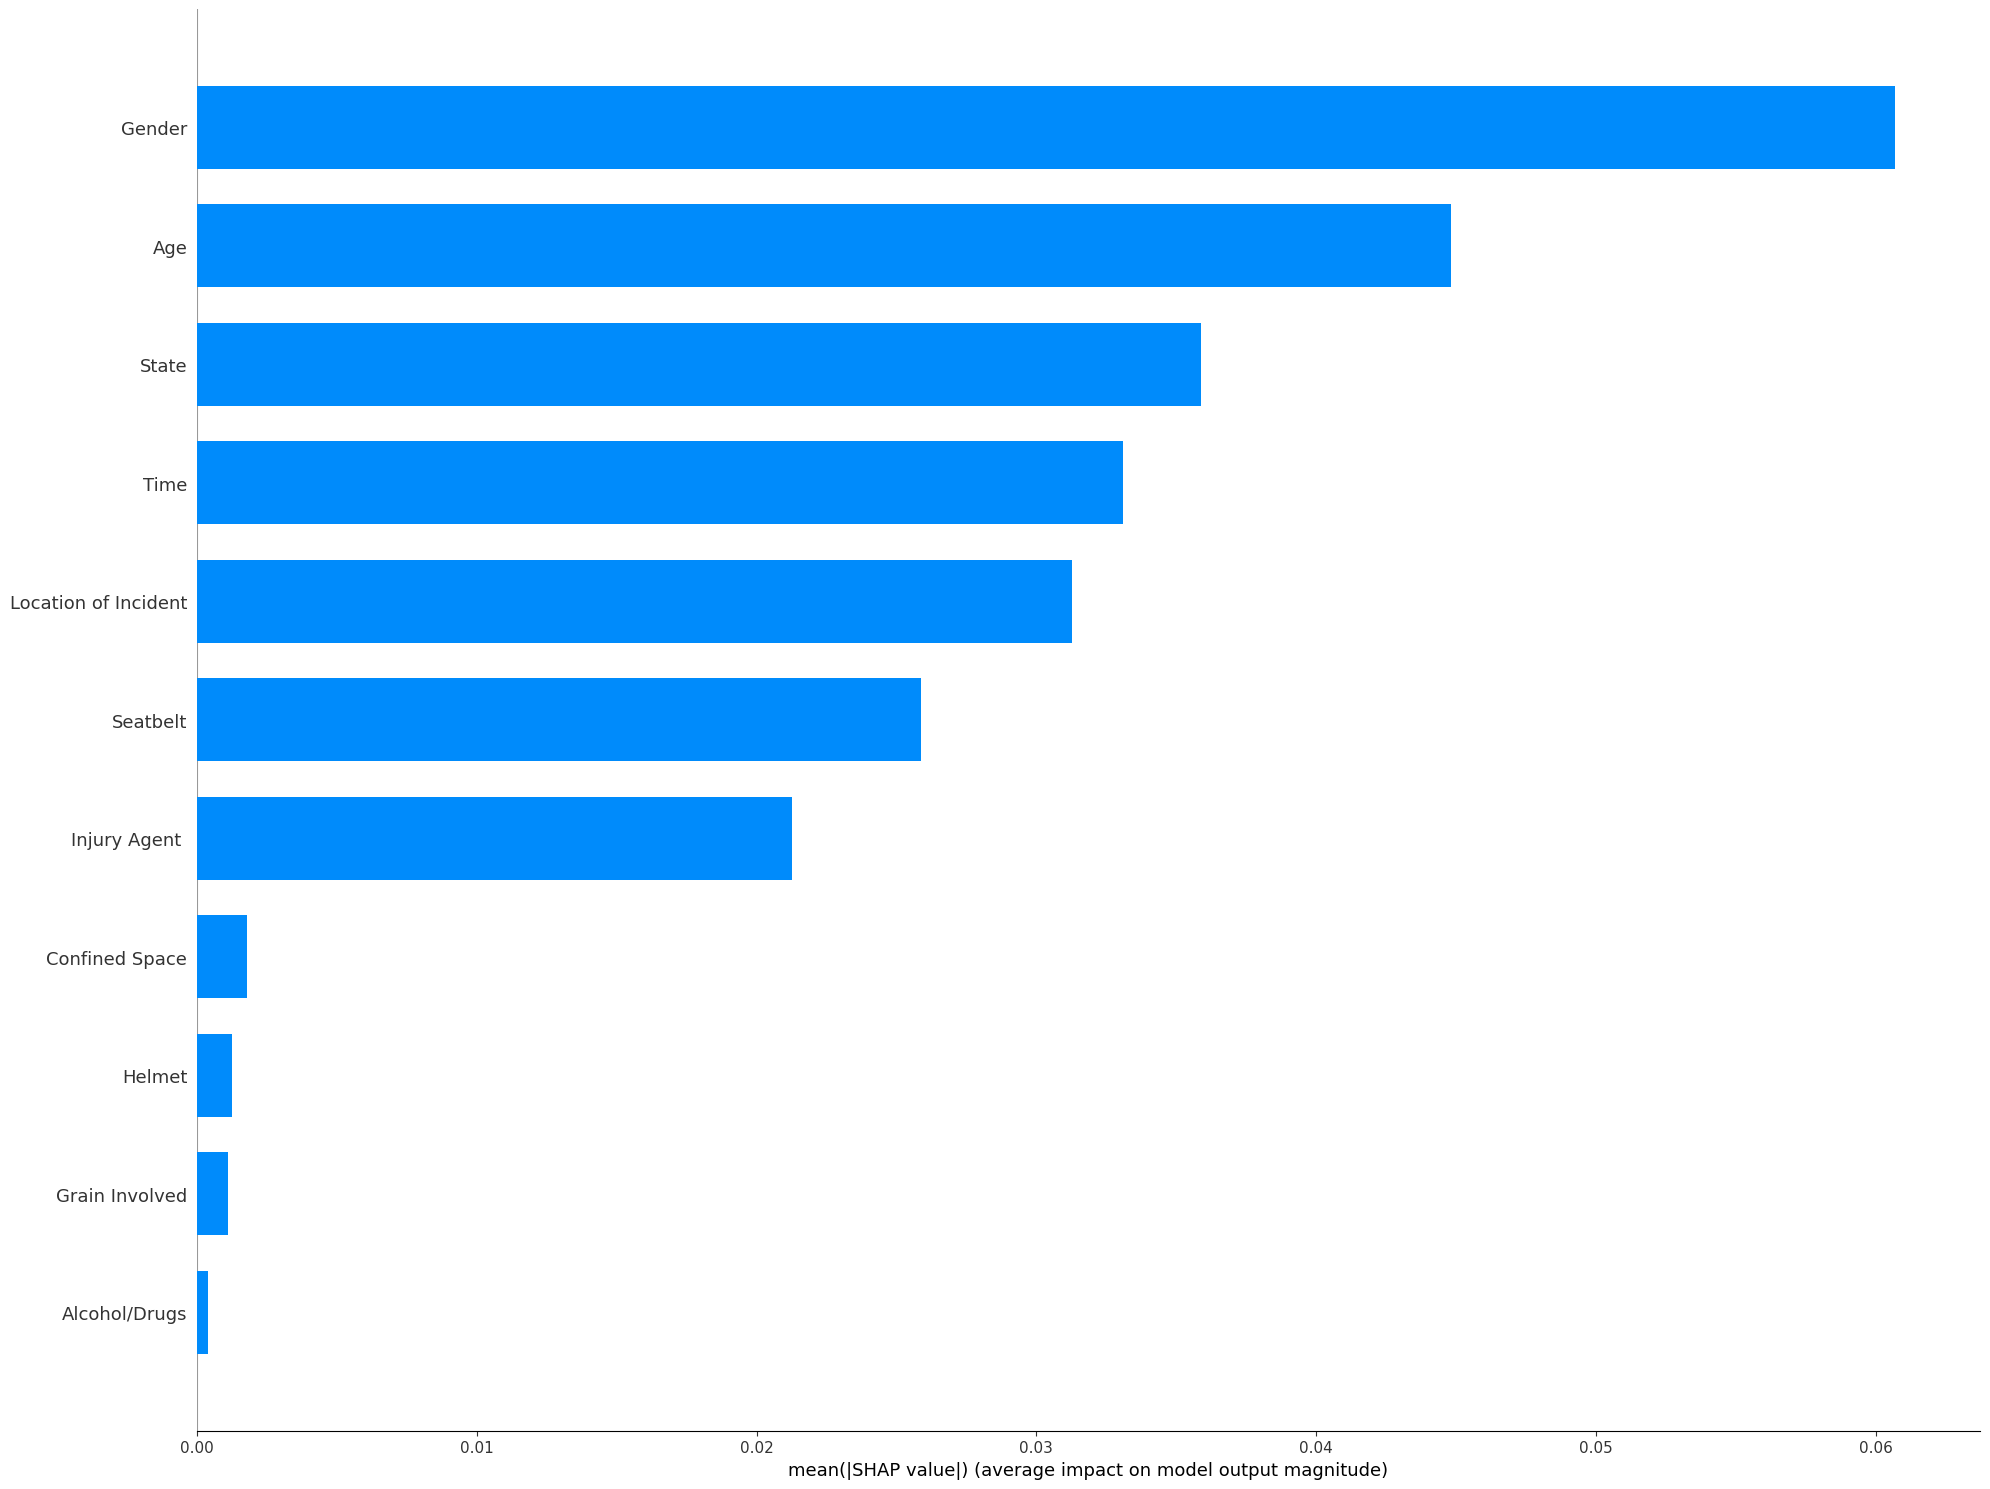

In [14]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 100)
explainer = shap.KernelExplainer(model.predict, X_test_shap)
shap_values = explainer.shap_values(X_test_shap)
shap.summary_plot(shap_values, X_test_shap,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)



c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_red":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_blue":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\_api\__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


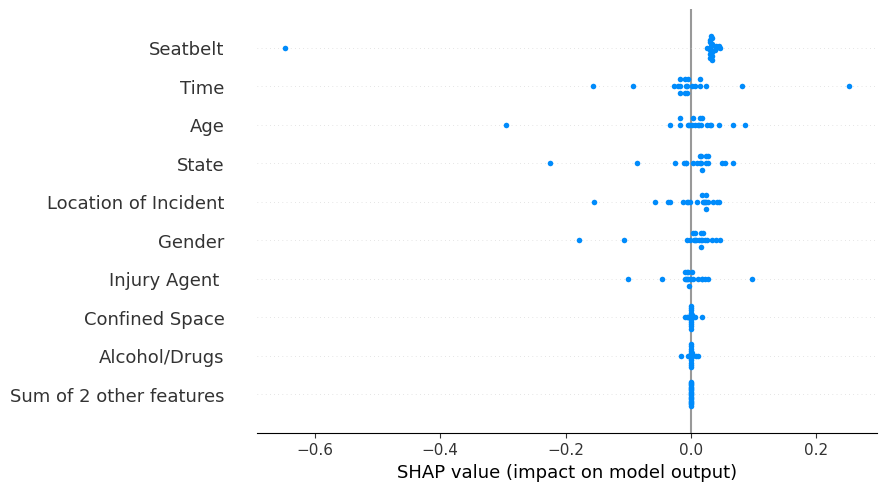

In [13]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)